In [1]:
!pip install hurst  
#import the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import KNNImputer
from matplotlib import rcParams
from scipy.stats import skew, kurtosis,norm
from hurst import compute_Hc


In [2]:
#loading the dataset
dialog=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FMIS\4th\thesis\data\original\Dialog Axiata PLC (DIAL.N0000).csv")

commercial=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FMIS\4th\thesis\data\original\Commercial Bank of Ceylon PLC (COMB.N0000).csv")

Hayleys=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FMIS\4th\thesis\data\original\Hayleys PLC (HAYL.N0000).csv")

Hemas=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FMIS\4th\thesis\data\original\Hemas Holdings PLC (HHL.N0000).csv")

keells=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FMIS\4th\thesis\data\original\HistoricalPrices-John Keells Holdings PLC (JKH.N0000).csv")


C:\Users\HP\AppData\Local\Temp\ipykernel_10780\2720849701.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])



Dialog --- Basic Statistics
count    2362.000000
mean       -0.000080
std         0.015297
min        -0.132489
25%        -0.008734
50%         0.000000
75%         0.008658
max         0.096228
Name: LogReturn, dtype: float64
Skewness: -0.5438331151850171
Kurtosis: 9.984095537394731
ADF Test p-value: 1.0632298037039913e-27
Hurst Exponent (H): 0.444


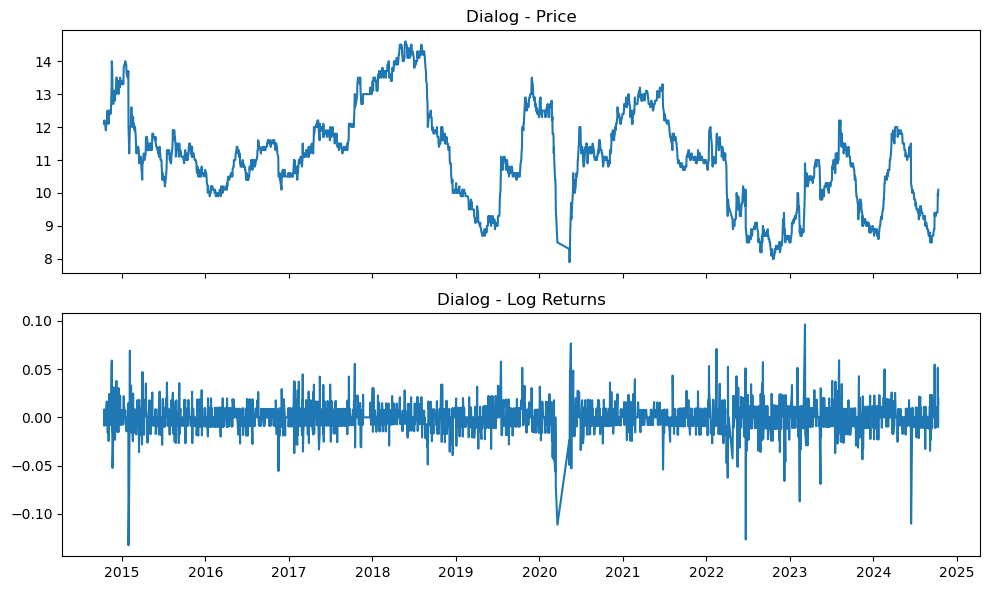

C:\Users\HP\AppData\Local\Temp\ipykernel_10780\2720849701.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])



Commercial --- Basic Statistics
count    2362.000000
mean       -0.000038
std         0.015955
min        -0.182053
25%        -0.006477
50%         0.000000
75%         0.005490
max         0.172183
Name: LogReturn, dtype: float64
Skewness: -0.004291386363297156
Kurtosis: 19.082132538781845
ADF Test p-value: 3.696914721829833e-15
Hurst Exponent (H): 0.532


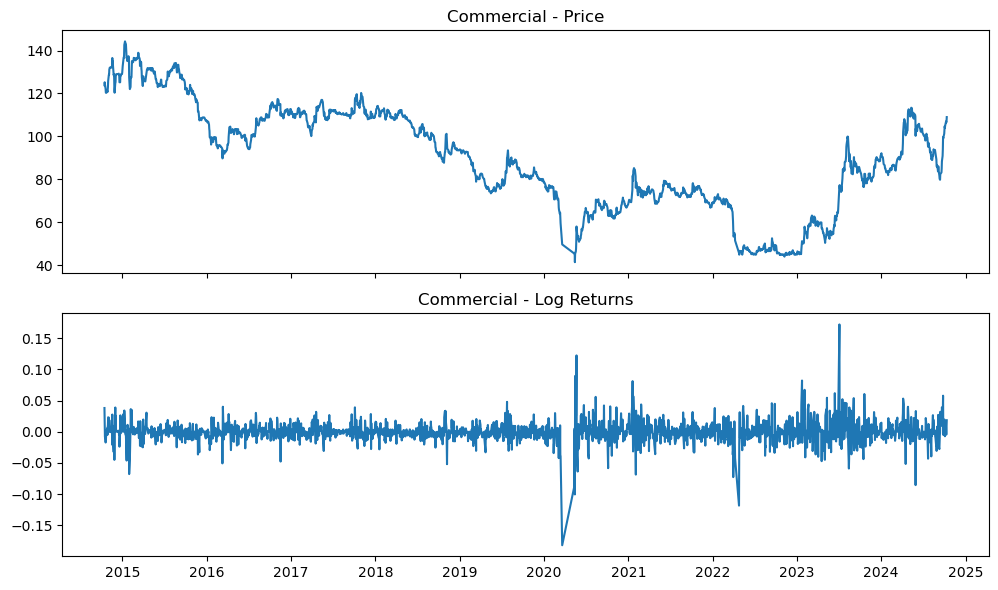

C:\Users\HP\AppData\Local\Temp\ipykernel_10780\2720849701.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])



Hayleys --- Basic Statistics
count    2303.000000
mean        0.000490
std         0.024253
min        -0.181999
25%        -0.008988
50%         0.000000
75%         0.006685
max         0.300585
Name: LogReturn, dtype: float64
Skewness: 1.6056528266797536
Kurtosis: 19.41064705043678
ADF Test p-value: 1.6520882933688063e-19
Hurst Exponent (H): 0.607


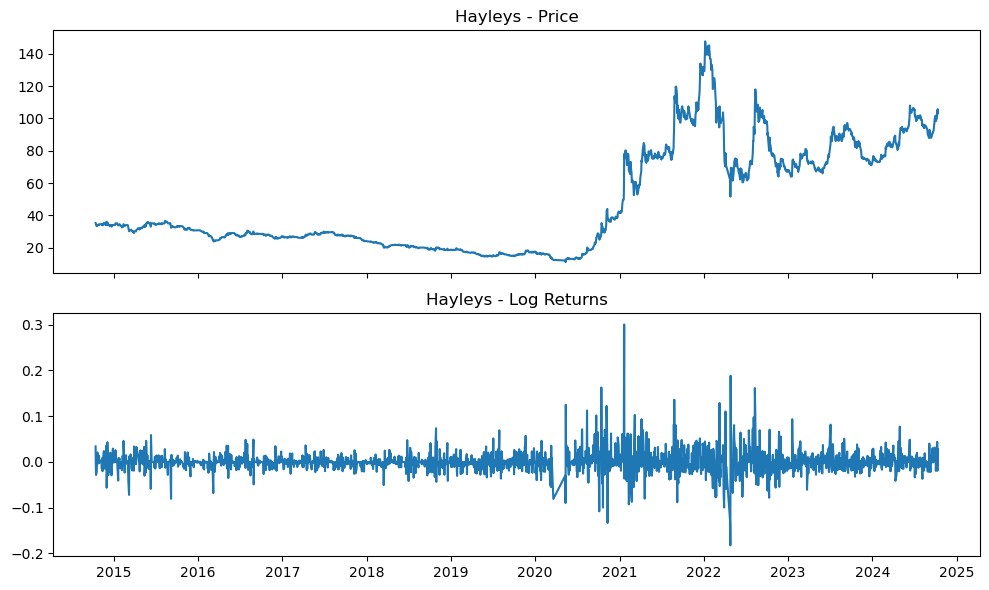

C:\Users\HP\AppData\Local\Temp\ipykernel_10780\2720849701.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])



Hemas --- Basic Statistics
count    2320.000000
mean        0.000130
std         0.017033
min        -0.104382
25%        -0.007390
50%         0.000000
75%         0.007306
max         0.096511
Name: LogReturn, dtype: float64
Skewness: 0.25387196644688637
Kurtosis: 3.7429812856636584
ADF Test p-value: 1.1463560945654212e-24
Hurst Exponent (H): 0.552


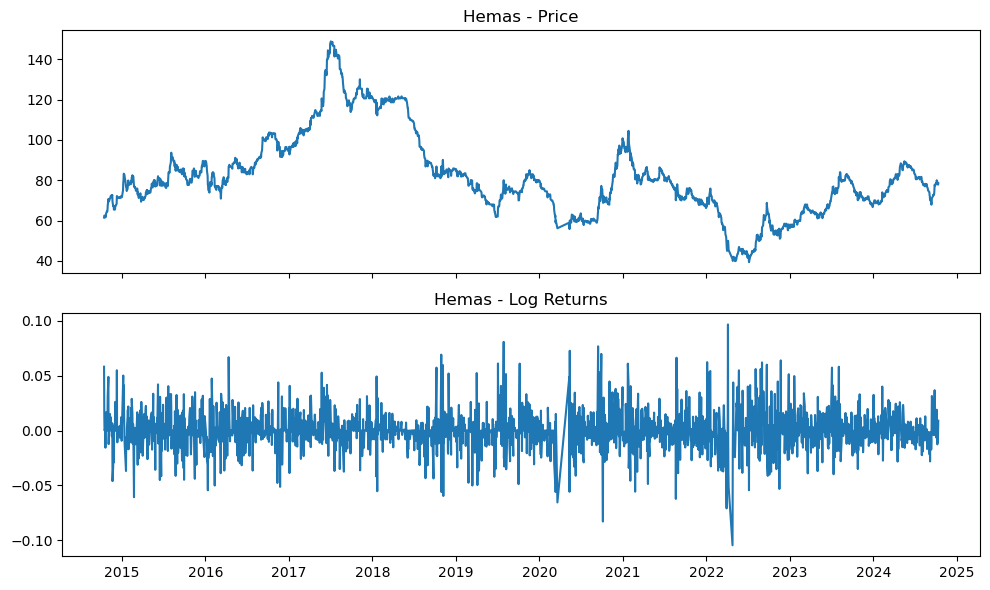

C:\Users\HP\AppData\Local\Temp\ipykernel_10780\2720849701.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])



Keells --- Basic Statistics
count    2357.000000
mean       -0.000004
std         0.014089
min        -0.129396
25%        -0.006363
50%         0.000000
75%         0.005806
max         0.090181
Name: LogReturn, dtype: float64
Skewness: -0.44316144776825434
Kurtosis: 10.025186930356286
ADF Test p-value: 3.716765228971185e-28
Hurst Exponent (H): 0.498


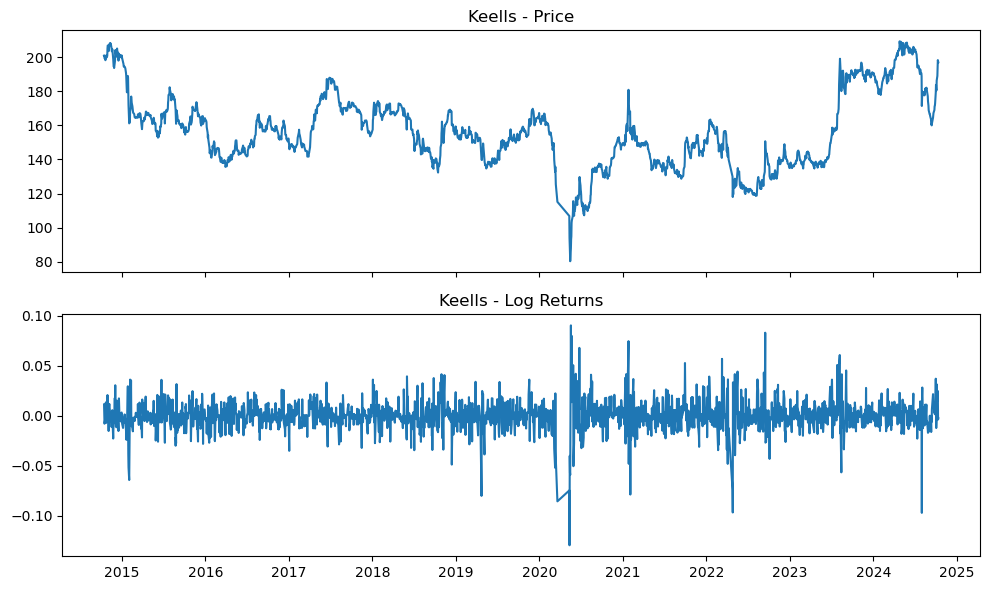

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

# Put all datasets in a dict for easy looping
stocks = {
    "Dialog": dialog,
    "Commercial": commercial,
    "Hayleys": Hayleys,
    "Hemas": Hemas,
    "Keells": keells
}

processed_data = {}

for name, df in stocks.items():
    # 1. Keep only Date and Close columns (adjust if needed)
    df = df[['Date', 'Close']]  
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df.dropna()
    
    # 2. Compute log returns
    df['LogReturn'] = np.log(df['Close']).diff()
    df = df.dropna()
    
    # 3. Save processed dataframe
    processed_data[name] = df
    
    # --- Exploratory analysis ---
    print(f"\n{name} --- Basic Statistics")
    print(df['LogReturn'].describe())
    print("Skewness:", stats.skew(df['LogReturn']))
    print("Kurtosis:", stats.kurtosis(df['LogReturn']))

    
    # Stationarity test (ADF)
    adf_pvalue = adfuller(df['LogReturn'])[1]
    print("ADF Test p-value:", adf_pvalue)
    
    # 4. Estimate Hurst exponent
    H, c, data = compute_Hc(df['LogReturn'], kind='change', simplified=True)
    print(f"Hurst Exponent (H): {H:.3f}")
    
    # Plot price and returns
    fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    axes[0].plot(df['Date'], df['Close'])
    axes[0].set_title(f"{name} - Price")
    axes[1].plot(df['Date'], df['LogReturn'])
    axes[1].set_title(f"{name} - Log Returns")
    plt.tight_layout()
    plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10780\3247211418.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10780\3247211418.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10780\3247211418.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste


=== Summary Table ===
        Stock    Mean     Min     Max  Median   Stdev    Skew
0      Dialog -0.0001 -0.1325  0.0962     0.0  0.0153 -0.5438
1  Commercial -0.0000 -0.1821  0.1722     0.0  0.0160 -0.0043
2     Hayleys  0.0005 -0.1820  0.3006     0.0  0.0243  1.6057
3       Hemas  0.0001 -0.1044  0.0965     0.0  0.0170  0.2539
4      Keells -0.0000 -0.1294  0.0902     0.0  0.0141 -0.4432


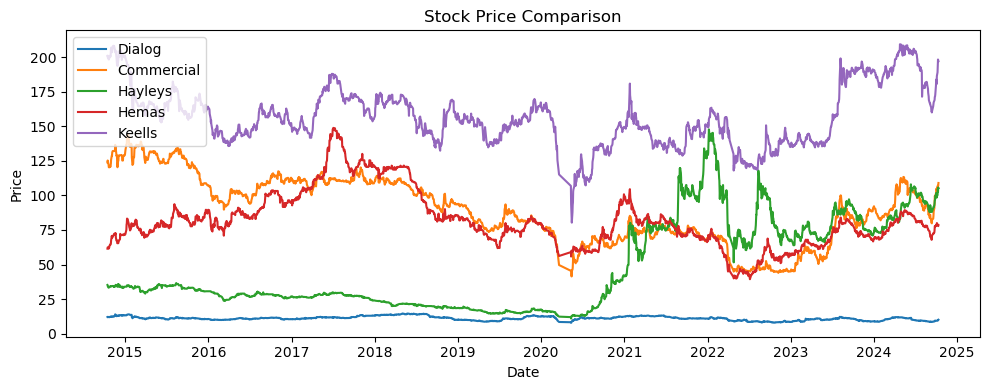

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats

stocks = {
    "Dialog": dialog,
    "Commercial": commercial,
    "Hayleys": Hayleys,
    "Hemas": Hemas,
    "Keells": keells
}

summary_rows = []
processed_data = {}

for name, df in stocks.items():
    # Keep only date & close
    df = df[['Date', 'Close']]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').dropna()
    
    # Compute log returns
    df['LogReturn'] = np.log(df['Close']).diff()
    df = df.dropna()
    processed_data[name] = df
    
    # Descriptive stats
    mean_ret = df['LogReturn'].mean()
    median_ret=df['LogReturn'].median()
    min_ret= df['LogReturn'].min()
    max_ret=df['LogReturn'].max()
    std_ret = df['LogReturn'].std()
    skew_ret = stats.skew(df['LogReturn'])
    kurt_ret = stats.kurtosis(df['LogReturn'])
    
    # ADF test
    adf_pvalue = adfuller(df['LogReturn'])[1]
    
    # Hurst exponent
    H, c, data = compute_Hc(df['LogReturn'], kind='change', simplified=True)
    
    summary_rows.append({
        "Stock": name,
        "Mean": mean_ret,
        "Min": min_ret,
        "Max": max_ret,
        "Median": median_ret,
        "Stdev": std_ret,
        "Skew": skew_ret
    })

# Create summary table
summary_df = pd.DataFrame(summary_rows)
print("\n=== Summary Table ===")
print(summary_df.round(4))

# Plot all prices in one frame
plt.figure(figsize=(10,4))
for name, df in processed_data.items():
    plt.plot(df['Date'], df['Close'], label=name)

plt.title("Stock Price Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc=2)
plt.tight_layout()
plt.show()


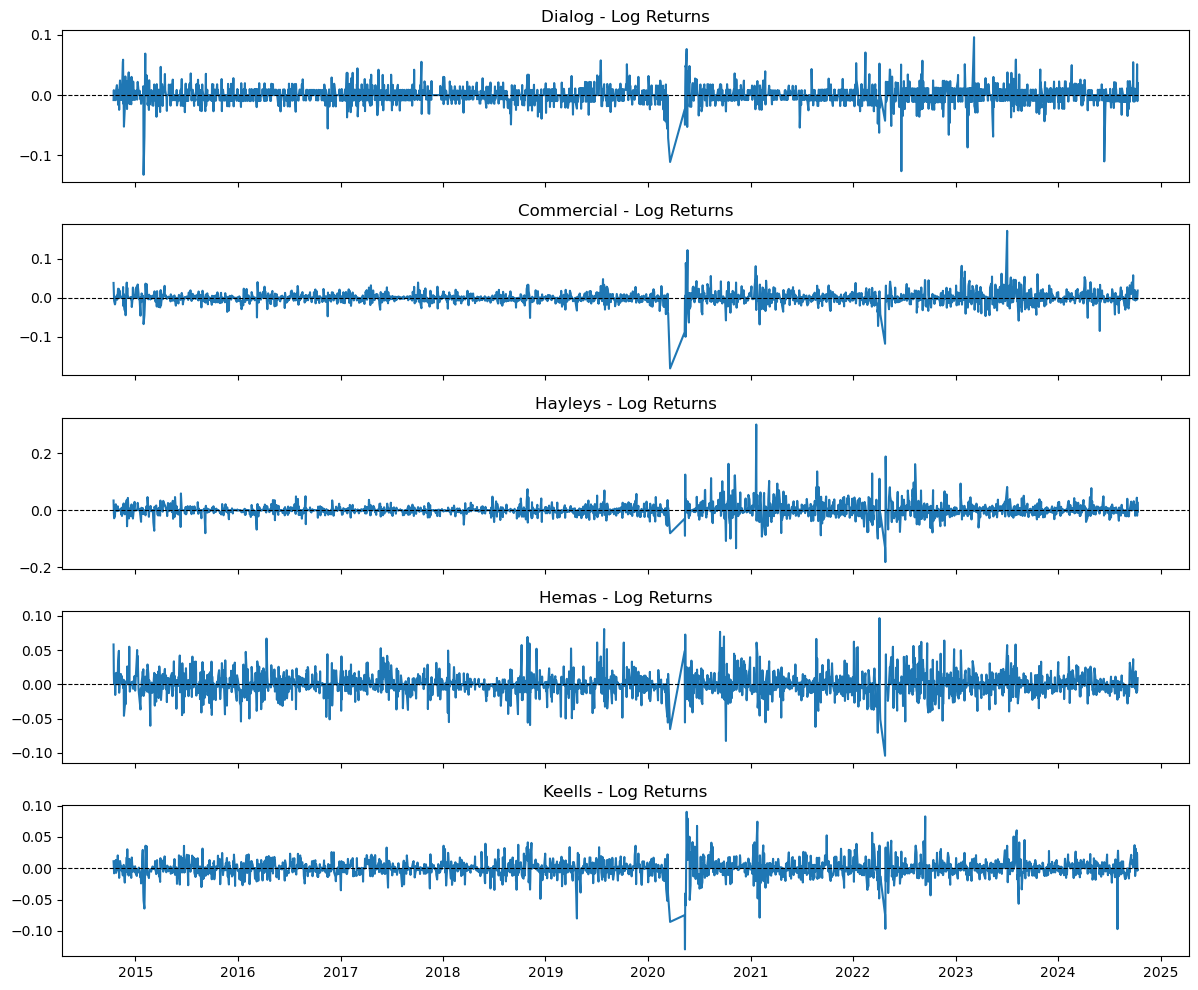

In [5]:
# Subplots for log returns of all stocks
fig, axes = plt.subplots(len(processed_data), 1, figsize=(12, 10), sharex=True)

for i, (name, df) in enumerate(processed_data.items()):
    axes[i].plot(df['Date'], df['LogReturn'], color="tab:blue")
    axes[i].set_title(f"{name} - Log Returns")
    axes[i].axhline(0, color="black", linewidth=0.8, linestyle="--")

plt.tight_layout()
plt.show()


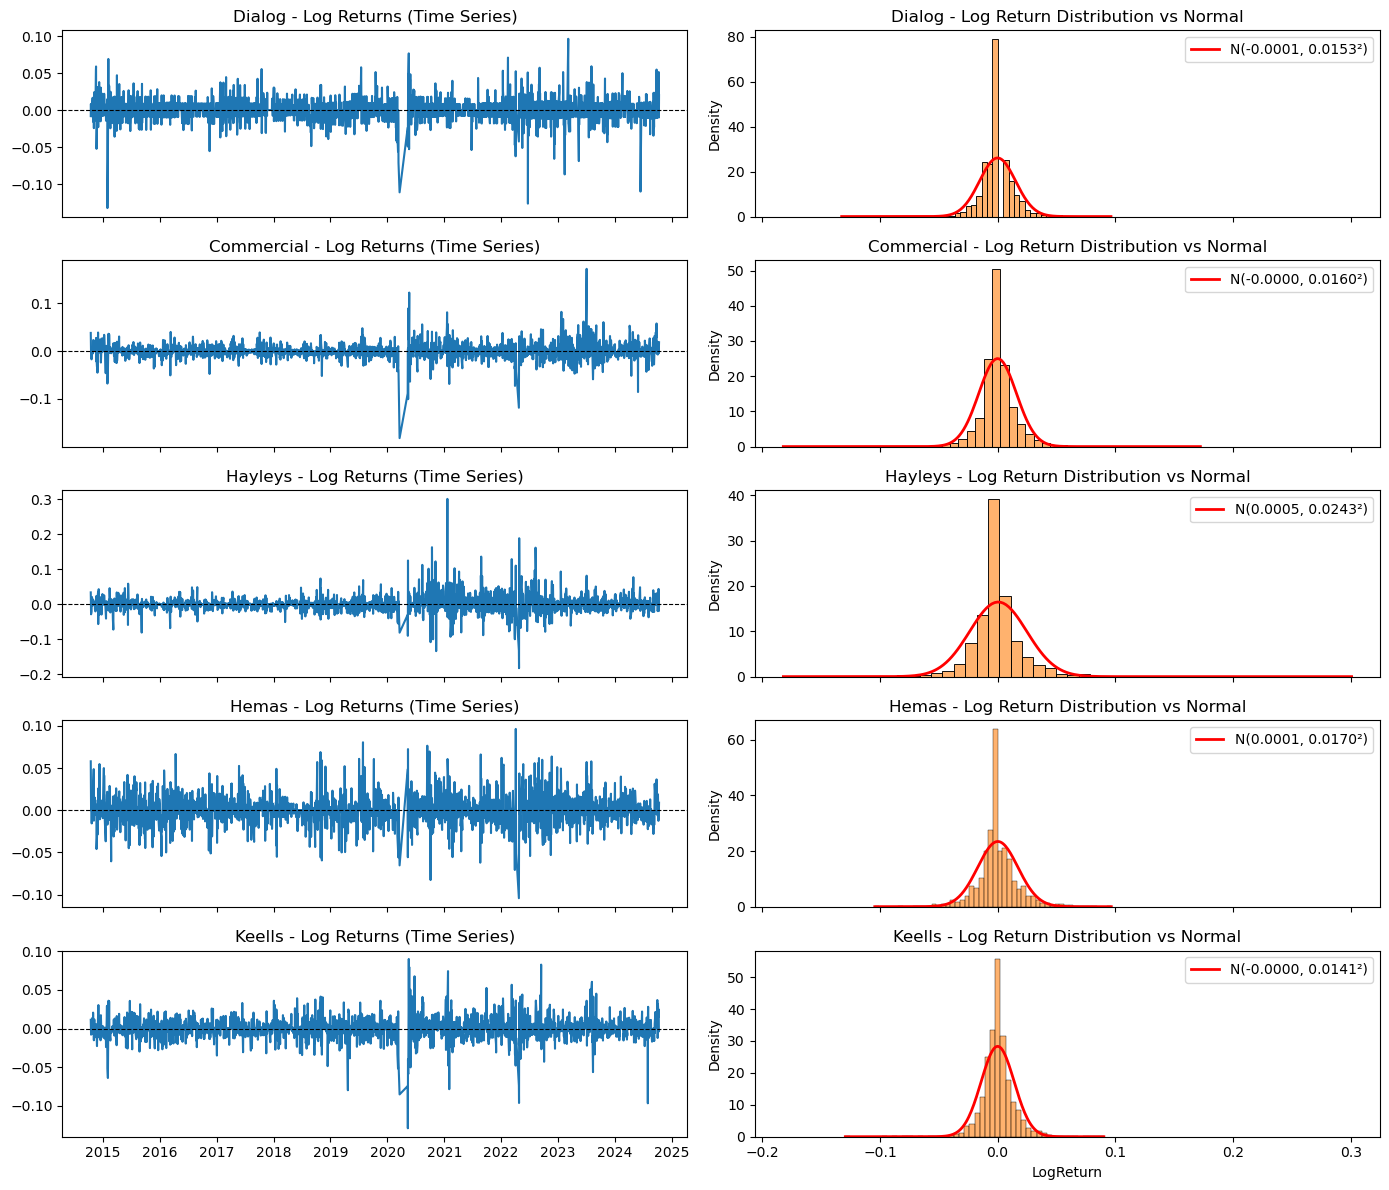

In [6]:
import seaborn as sns
from scipy.stats import norm
import numpy as np

# Subplots: rows = stocks, 2 columns (time-series, histogram with normal overlay)
fig, axes = plt.subplots(len(processed_data), 2, figsize=(14, 12), sharex='col')

for i, (name, df) in enumerate(processed_data.items()):
    # Time-series of log returns
    axes[i,0].plot(df['Date'], df['LogReturn'], color="tab:blue")
    axes[i,0].set_title(f"{name} - Log Returns (Time Series)")
    axes[i,0].axhline(0, color="black", linewidth=0.8, linestyle="--")
    
    # Histogram
    sns.histplot(df['LogReturn'], bins=50, stat="density", ax=axes[i,1], color="tab:orange", alpha=0.6)
    
    # Fit normal distribution
    mu, sigma = df['LogReturn'].mean(), df['LogReturn'].std()
    x = np.linspace(df['LogReturn'].min(), df['LogReturn'].max(), 200)
    pdf = norm.pdf(x, mu, sigma)
    
    # Overlay normal curve
    axes[i,1].plot(x, pdf, 'r-', lw=2, label=f"N({mu:.4f}, {sigma:.4f}²)")
    axes[i,1].set_title(f"{name} - Log Return Distribution vs Normal")
    axes[i,1].legend()

plt.tight_layout()
plt.show()


In [7]:
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import shapiro

summary_rows = []

for name, df in processed_data.items():
    # Descriptive stats
    mean_ret = df['LogReturn'].mean()
    std_ret = df['LogReturn'].std()
    skew_ret = stats.skew(df['LogReturn'])
    kurt_ret = stats.kurtosis(df['LogReturn'])
    
    # ADF test
    adf_pvalue = adfuller(df['LogReturn'])[1]
    
    # Hurst exponent
    H, c, data = compute_Hc(df['LogReturn'], kind='change', simplified=True)
    
    # Normality tests
    jb_stat, jb_pvalue, _, _ = jarque_bera(df['LogReturn'])
    shapiro_stat, shapiro_pvalue = shapiro(df['LogReturn'])
    
    summary_rows.append({
        "Stock": name,
        "Mean": mean_ret,
        "StdDev": std_ret,
        "Skewness": skew_ret,
        "Kurtosis": kurt_ret,
        "ADF_pvalue": adf_pvalue,
        "Hurst":H,
        "Shapiro_pvalue": shapiro_pvalue
    })

# Create summary table
summary_df = pd.DataFrame(summary_rows)
print("\n=== Summary Table ===")
print(summary_df.round(4))



=== Summary Table ===
        Stock    Mean  StdDev  Skewness  Kurtosis  ADF_pvalue   Hurst  \
0      Dialog -0.0001  0.0153   -0.5438    9.9841         0.0  0.4445   
1  Commercial -0.0000  0.0160   -0.0043   19.0821         0.0  0.5318   
2     Hayleys  0.0005  0.0243    1.6057   19.4106         0.0  0.6073   
3       Hemas  0.0001  0.0170    0.2539    3.7430         0.0  0.5517   
4      Keells -0.0000  0.0141   -0.4432   10.0252         0.0  0.4984   

   Shapiro_pvalue  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


In [8]:
pip install hurst

Note: you may need to restart the kernel to use updated packages.


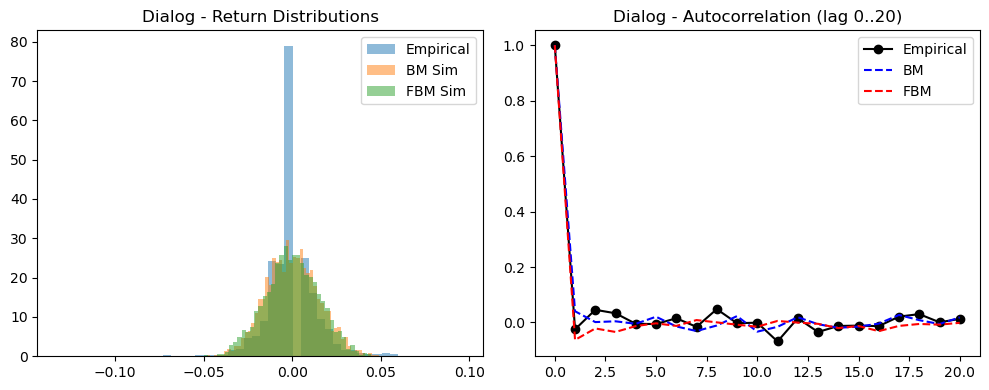

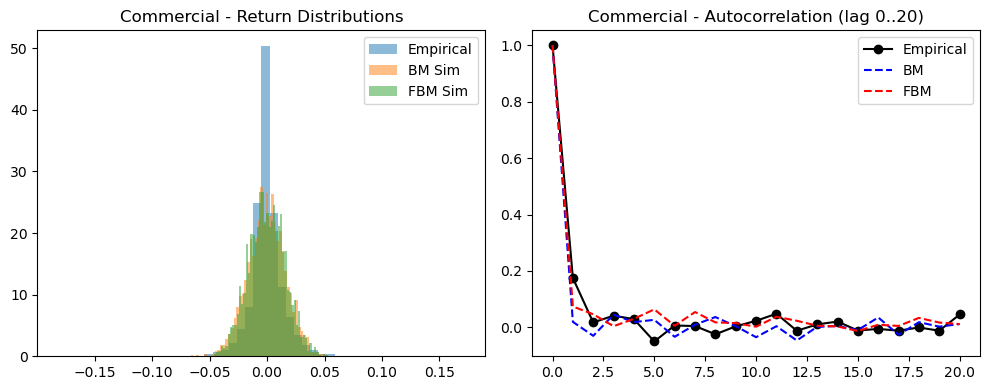

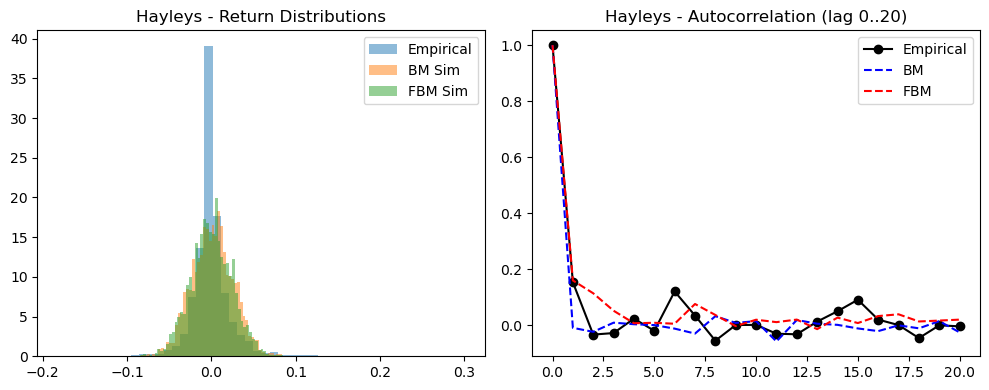

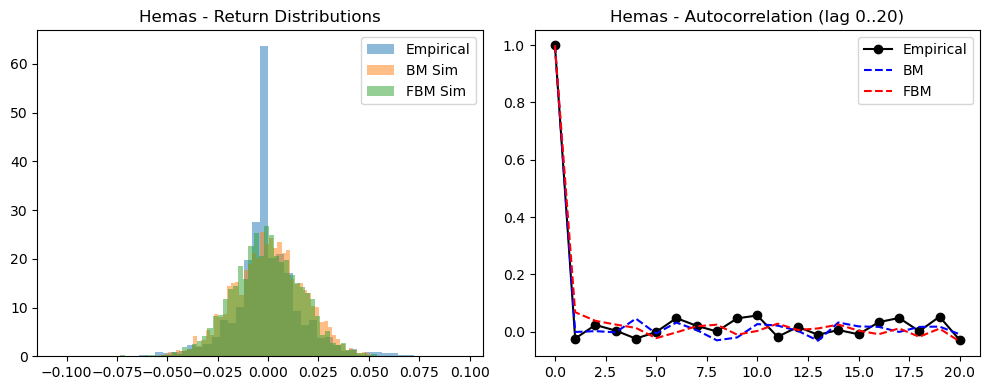

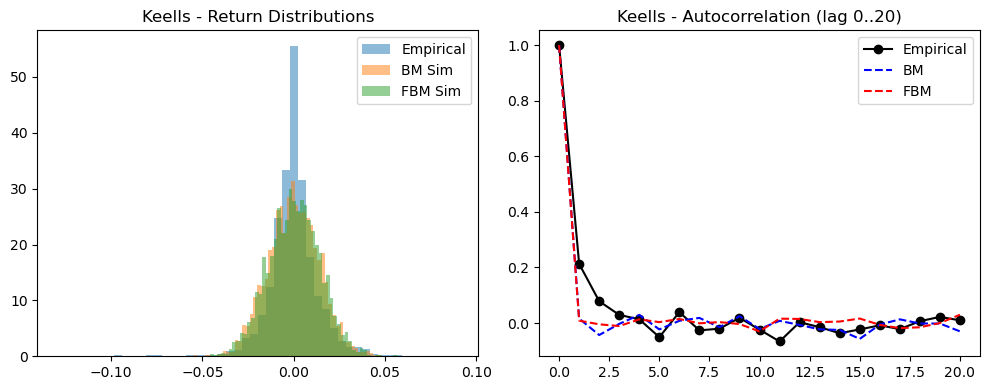


=== BM vs FBM Fit Summary ===
        Stock   H_est  KS_p_BM  KS_p_FBM  ACF_MSE_BM  ACF_MSE_FBM Winner
0      Dialog  0.4445      0.0       0.0      0.0009       0.0012     BM
1  Commercial  0.5318      0.0       0.0      0.0024       0.0018    FBM
2     Hayleys  0.6073      0.0       0.0      0.0039       0.0036    FBM
3       Hemas  0.5517      0.0       0.0      0.0010       0.0014     BM
4      Keells  0.4984      0.0       0.0      0.0035       0.0034    FBM


In [9]:
from fbm import FBM
from statsmodels.tsa.stattools import acf
from scipy.stats import kstest

fit_results = []
summary_df = pd.DataFrame(summary_rows)
for name, df in processed_data.items():
    returns = df["LogReturn"].dropna().values
    n = len(returns)
    mu, sigma = returns.mean(), returns.std()

    # --- Safely fetch Hurst exponent ---
    if "DFA" in summary_df.columns:
        H = summary_df.loc[summary_df["Stock"] == name, "DFA"].values[0]
    elif "Avg_H" in summary_df.columns:
        H = summary_df.loc[summary_df["Stock"] == name, "Avg_H"].values[0]
    elif "Hurst" in summary_df.columns:
        H = summary_df.loc[summary_df["Stock"] == name, "Hurst"].values[0]
    else:
        raise KeyError("No valid Hurst column found in summary_df")

    # --- Simulate BM ---
    bm_returns = np.random.normal(mu, sigma, n)

    # --- Simulate FBM ---
    f = FBM(n=n, hurst=H, length=1, method="daviesharte")
    fbm_path = f.fbm()
    fbm_returns = np.diff(fbm_path)
    fbm_returns = fbm_returns * (sigma / fbm_returns.std())  # rescale

    # --- Goodness-of-fit tests ---
    ks_bm = kstest(returns, 'norm', args=(bm_returns.mean(), bm_returns.std()))
    ks_fbm = kstest(returns, 'norm', args=(fbm_returns.mean(), fbm_returns.std()))

    lags = 20
    emp_acf = acf(returns, nlags=lags, fft=True)
    bm_acf = acf(bm_returns, nlags=lags, fft=True)
    fbm_acf = acf(fbm_returns, nlags=lags, fft=True)

    acf_err_bm = np.mean((emp_acf[1:] - bm_acf[1:])**2)
    acf_err_fbm = np.mean((emp_acf[1:] - fbm_acf[1:])**2)

    fit_results.append({
        "Stock": name,
        "H_est": H,
        "KS_p_BM": ks_bm.pvalue,
        "KS_p_FBM": ks_fbm.pvalue,
        "ACF_MSE_BM": acf_err_bm,
        "ACF_MSE_FBM": acf_err_fbm,
        "Winner": "FBM" if acf_err_fbm < acf_err_bm else "BM"
    })

    # --- Plots ---
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    # Distribution comparison
    axes[0].hist(returns, bins=50, density=True, alpha=0.5, label="Empirical")
    axes[0].hist(bm_returns, bins=50, density=True, alpha=0.5, label="BM Sim")
    axes[0].hist(fbm_returns, bins=50, density=True, alpha=0.5, label="FBM Sim")
    axes[0].set_title(f"{name} - Return Distributions")
    axes[0].legend()

    # ACF comparison
    axes[1].plot(emp_acf, "ko-", label="Empirical")
    axes[1].plot(bm_acf, "b--", label="BM")
    axes[1].plot(fbm_acf, "r--", label="FBM")
    axes[1].set_title(f"{name} - Autocorrelation (lag 0..20)")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# --- Summary table ---
fit_summary_df = pd.DataFrame(fit_results)
print("\n=== BM vs FBM Fit Summary ===")
print(fit_summary_df.round(4))


In [10]:
# --- Helper: aggregate returns and compute slope ---
def variance_time_slope(returns, windows=(1,2,4,8,16,32)):
    xs, ys = [], []
    for m in windows:
        n = len(returns) // m
        if n < 5:
            continue
        r_trim = returns[:n*m].reshape(n, m).sum(axis=1)
        xs.append(np.log(m))
        ys.append(np.log(np.var(r_trim, ddof=1)))
    xs, ys = np.array(xs), np.array(ys)
    if len(xs) < 2:
        return np.nan
    slope, _ = np.polyfit(xs, ys, 1)
    return slope

fit_results = []

for name, df in processed_data.items():
    returns = df["LogReturn"].dropna().values
    n = len(returns)
    mu, sigma = returns.mean(), returns.std()
    H = summary_df.loc[summary_df["Stock"] == name, "Hurst"].values[0]
    
    # BM sim
    bm_returns = np.random.normal(mu, sigma, n)
    # FBM sim
    from fbm import FBM
    f = FBM(n=n, hurst=H, length=1, method="daviesharte")
    fbm_path = f.fbm()
    fbm_returns = np.diff(fbm_path)
    fbm_returns = fbm_returns * (sigma / fbm_returns.std())
    
    # ACF comparison
    from statsmodels.tsa.stattools import acf
    emp_acf = acf(returns, nlags=20, fft=True)
    bm_acf = acf(bm_returns, nlags=20, fft=True)
    fbm_acf = acf(fbm_returns, nlags=20, fft=True)
    acf_err_bm = np.mean((emp_acf[1:] - bm_acf[1:])**2)
    acf_err_fbm = np.mean((emp_acf[1:] - fbm_acf[1:])**2)
    
    # KS tests
    from scipy.stats import kstest
    ks_bm = kstest(returns, 'norm', args=(bm_returns.mean(), bm_returns.std()))
    ks_fbm = kstest(returns, 'norm', args=(fbm_returns.mean(), fbm_returns.std()))
    
    # Variance–time slopes
    slope_emp = variance_time_slope(returns)
    slope_bm = variance_time_slope(bm_returns)
    slope_fbm = variance_time_slope(fbm_returns)
    slope_err_bm = abs(slope_emp - 1.0)     # BM expected slope = 1
    slope_err_fbm = abs(slope_emp - 2*H)    # FBM expected slope = 2H
    
    fit_results.append({
        "Stock": name,
        "H_est": H,
        "KS_p_BM": ks_bm.pvalue,
        "KS_p_FBM": ks_fbm.pvalue,
        "ACF_MSE_BM": acf_err_bm,
        "ACF_MSE_FBM": acf_err_fbm,
        "Slope_emp": slope_emp,
        "Slope_exp_BM": 1.0,
        "Slope_exp_FBM": 2*H,
        "Slope_err_BM": slope_err_bm,
        "Slope_err_FBM": slope_err_fbm,
        "Winner": "FBM" if (acf_err_fbm + slope_err_fbm) < (acf_err_bm + slope_err_bm) else "BM"
    })

fit_summary_df = pd.DataFrame(fit_results)
print("\n=== BM vs FBM Fit Summary with Variance–Time Scaling ===")
print(fit_summary_df.round(4))



=== BM vs FBM Fit Summary with Variance–Time Scaling ===
        Stock   H_est  KS_p_BM  KS_p_FBM  ACF_MSE_BM  ACF_MSE_FBM  Slope_emp  \
0      Dialog  0.4445      0.0       0.0      0.0011       0.0012     0.9945   
1  Commercial  0.5318      0.0       0.0      0.0029       0.0017     1.0752   
2     Hayleys  0.6073      0.0       0.0      0.0039       0.0023     1.0614   
3       Hemas  0.5517      0.0       0.0      0.0015       0.0010     1.1161   
4      Keells  0.4984      0.0       0.0      0.0033       0.0033     1.0708   

   Slope_exp_BM  Slope_exp_FBM  Slope_err_BM  Slope_err_FBM Winner  
0           1.0         0.8889        0.0055         0.1056     BM  
1           1.0         1.0636        0.0752         0.0116    FBM  
2           1.0         1.2145        0.0614         0.1531     BM  
3           1.0         1.1035        0.1161         0.0126    FBM  
4           1.0         0.9967        0.0708         0.0740     BM  


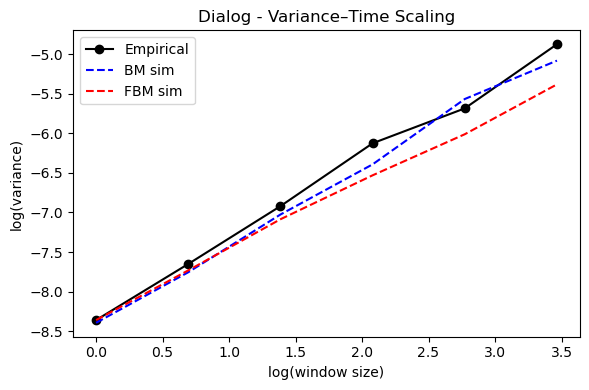

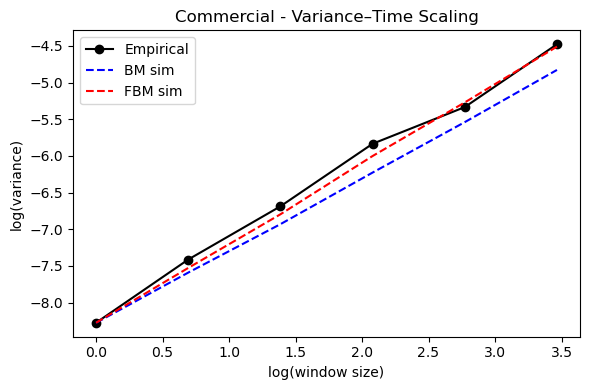

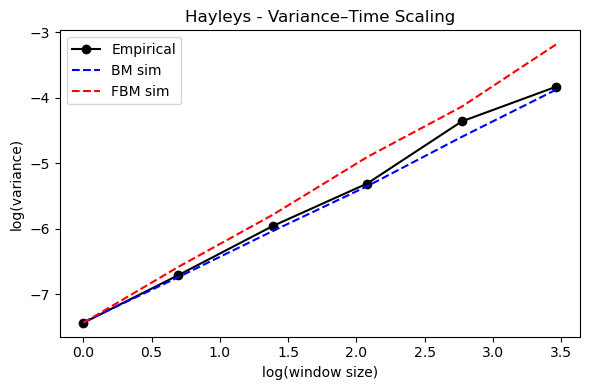

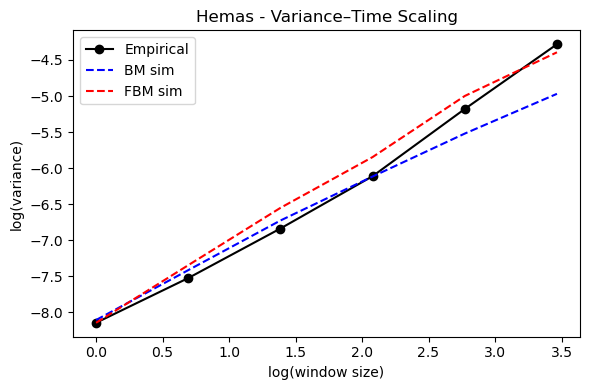

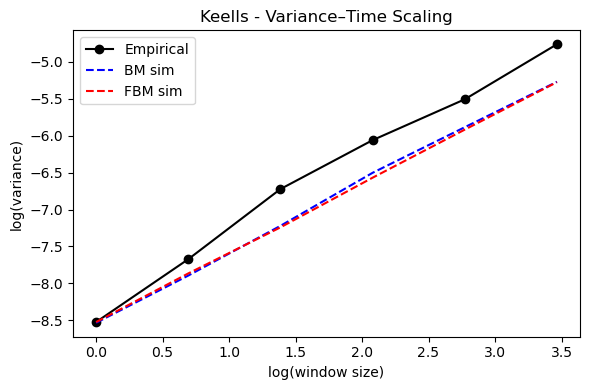

In [11]:
# Variance–time scaling plots for each stock
import matplotlib.pyplot as plt

windows = [1,2,4,8,16,32]

for name, df in processed_data.items():
    returns = df["LogReturn"].dropna().values
    H = summary_df.loc[summary_df["Stock"]==name,"Hurst"].values[0]
    sigma = returns.std()
    
    # Simulate BM & FBM returns
    bm_returns = np.random.normal(returns.mean(), sigma, len(returns))
    f = FBM(n=len(returns), hurst=H, length=1, method="daviesharte")
    fbm_returns = np.diff(f.fbm())
    fbm_returns = fbm_returns * (sigma / fbm_returns.std())
    
    # Collect slopes
    def var_time_points(r, windows):
        xs, ys = [], []
        for m in windows:
            n = len(r)//m
            if n < 5: continue
            agg = r[:n*m].reshape(n, m).sum(axis=1)
            xs.append(np.log(m))
            ys.append(np.log(np.var(agg, ddof=1)))
        return np.array(xs), np.array(ys)
    
    xs_emp, ys_emp = var_time_points(returns, windows)
    xs_bm, ys_bm = var_time_points(bm_returns, windows)
    xs_fbm, ys_fbm = var_time_points(fbm_returns, windows)
    
    # Plot
    plt.figure(figsize=(6,4))
    plt.plot(xs_emp, ys_emp, 'ko-', label="Empirical")
    plt.plot(xs_bm, ys_bm, 'b--', label="BM sim")
    plt.plot(xs_fbm, ys_fbm, 'r--', label="FBM sim")
    plt.title(f"{name} - Variance–Time Scaling")
    plt.xlabel("log(window size)")
    plt.ylabel("log(variance)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [12]:
pip install arch


D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002348. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002348. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which

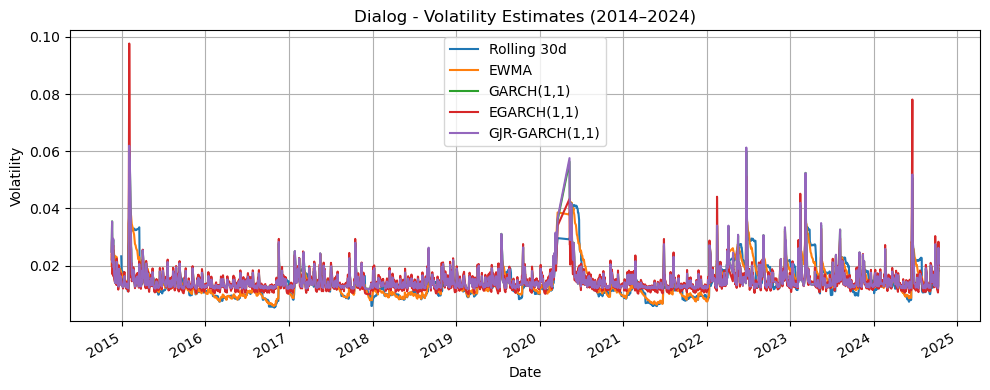

D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000255. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000255. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which m

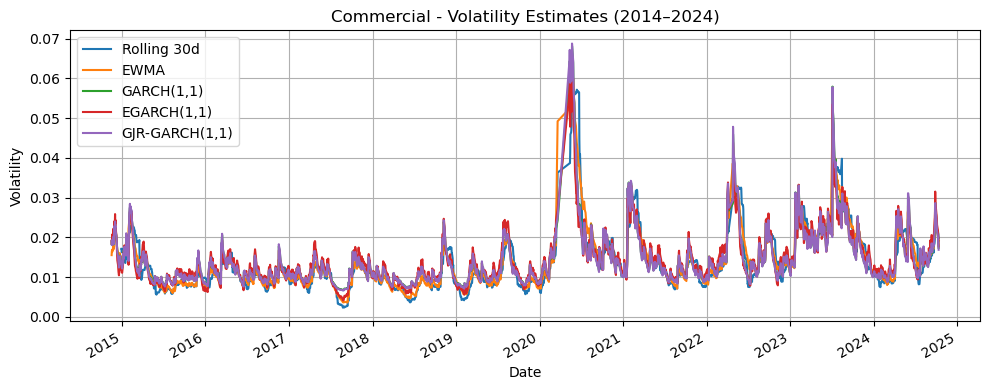

D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005917. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005917. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which

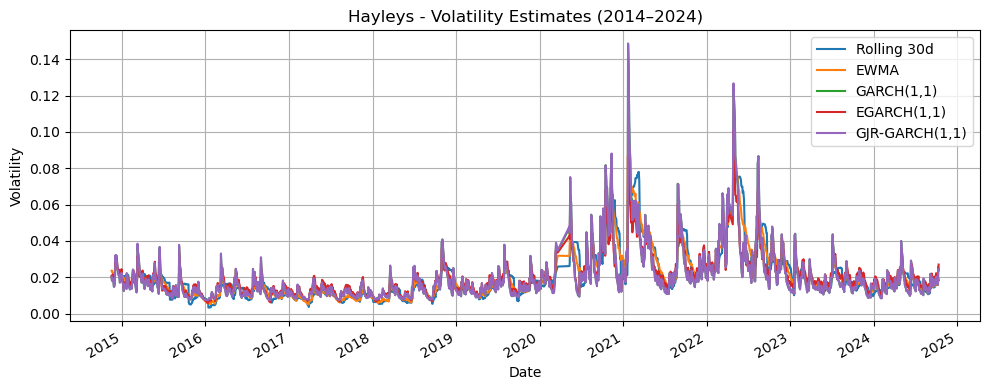

D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which

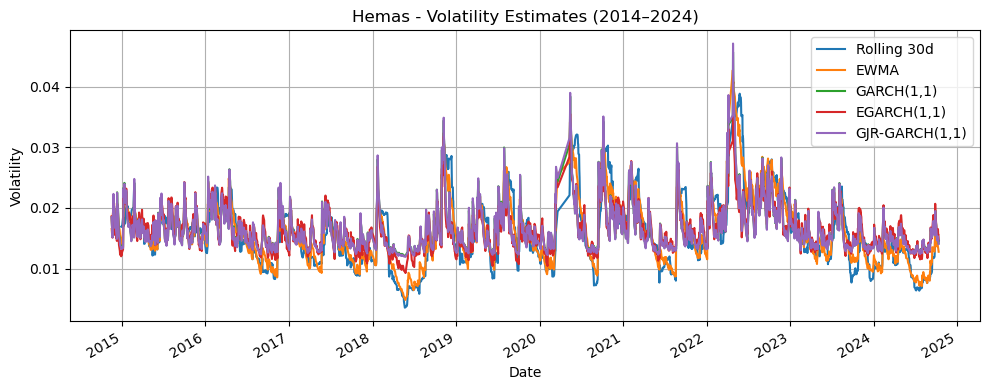

D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001996. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001996. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\anaconda\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which

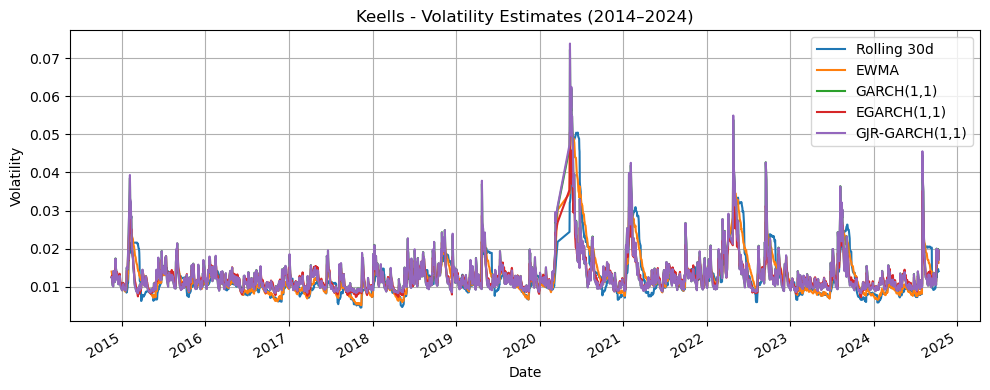

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Store your stock DataFrames in a dictionary
stock_data = {
    "Dialog": dialog,
    "Commercial": commercial,
    "Hayleys": Hayleys,
    "Hemas": Hemas,
    "Keells": keells
}

start_date = "2014-11-14"
end_date = "2024-11-14"
vol_results = {}

for name, df in stock_data.items():
    df = df.copy()
    
    # Convert Date column to datetime if needed
    if not np.issubdtype(df['Date'].dtype, np.datetime64):
        df['Date'] = pd.to_datetime(df['Date'])

    # Filter date range
    df = df.sort_values("Date")
    df = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)].copy()
    
    # Identify close price column
    close_col = "Close" if "Close" in df.columns else "Close Price"
    df["LogReturn"] = np.log(df[close_col] / df[close_col].shift(1))
    df.dropna(inplace=True)
    df.set_index("Date", inplace=True)

    # Rolling Volatility (30-day)
    df["RollingVol_30"] = df["LogReturn"].rolling(window=30).std()

    # EWMA Volatility
    lambda_ = 0.94
    ewma_var = []
    var_t = df["LogReturn"].var()
    for r in df["LogReturn"]:
        var_t = lambda_ * var_t + (1 - lambda_) * r ** 2
        ewma_var.append(var_t)
    df["EWMA_vol"] = np.sqrt(ewma_var)

    # GARCH(1,1)
    garch = arch_model(df["LogReturn"], vol="GARCH", p=1, q=1)
    res_garch = garch.fit(disp="off")
    df["GARCH_vol"] = res_garch.conditional_volatility

    # EGARCH(1,1)
    egarch = arch_model(df["LogReturn"], vol="EGARCH", p=1, o=0, q=1)
    res_egarch = egarch.fit(disp="off")
    df["EGARCH_vol"] = res_egarch.conditional_volatility

    # GJR-GARCH(1,1)
    gjr = arch_model(df["LogReturn"], vol="GARCH", p=1, o=1, q=1)
    res_gjr = gjr.fit(disp="off")
    df["GJR_GARCH_vol"] = res_gjr.conditional_volatility

    # Save results
    vol_results[name] = df

    # Plot
    plt.figure(figsize=(10, 4))
    df["RollingVol_30"].plot(label="Rolling 30d")
    df["EWMA_vol"].plot(label="EWMA")
    df["GARCH_vol"].plot(label="GARCH(1,1)")
    df["EGARCH_vol"].plot(label="EGARCH(1,1)")
    df["GJR_GARCH_vol"].plot(label="GJR-GARCH(1,1)")
    plt.title(f"{name} - Volatility Estimates (2014–2024)")
    plt.ylabel("Volatility")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

vol_eval_summary = []

for stock, df in vol_results.items():
    df = df.copy()
    # Target: realized next-day volatility proxy
    df["TargetVol"] = np.sqrt(df["LogReturn"].shift(-1)**2)
    df.dropna(inplace=True)

    # Candidate volatility estimators
    methods = {
        "RollingVol_30": df["RollingVol_30"],
        "EWMA_vol": df["EWMA_vol"],
        "GARCH_vol": df["GARCH_vol"],
        "EGARCH_vol": df["EGARCH_vol"],
        "GJR_GARCH_vol": df["GJR_GARCH_vol"]
    }

    # Evaluate RMSE & MAE
    for method_name, estimate in methods.items():
        aligned = pd.concat([df["TargetVol"], estimate], axis=1).dropna()
        if aligned.empty:  # skip if no overlap
            continue
        rmse = np.sqrt(mean_squared_error(aligned["TargetVol"], aligned[estimate.name]))
        mae  = mean_absolute_error(aligned["TargetVol"], aligned[estimate.name])
        vol_eval_summary.append({
            "Stock": stock,
            "Method": method_name,
            "RMSE": rmse,
            "MAE": mae
        })

# Full results
vol_eval_df = pd.DataFrame(vol_eval_summary)
print("\n=== Step 3: Volatility Estimation RMSE/MAE Summary ===")
print(vol_eval_df.round(6))

# Best volatility estimator per stock (minimum RMSE)
best_vol_df = vol_eval_df.loc[vol_eval_df.groupby("Stock")["RMSE"].idxmin()].reset_index(drop=True)
print("\n=== Best Volatility Estimator per Stock (Step 3) ===")
print(best_vol_df.round(6))

# Optional: save to CSV
# vol_eval_df.to_csv("Step3_volatility_eval_all.csv", index=False)
# best_vol_df.to_csv("Step3_best_volatility.csv", index=False)



=== Step 3: Volatility Estimation RMSE/MAE Summary ===
         Stock         Method      RMSE       MAE
0       Dialog  RollingVol_30  0.012940  0.009494
1       Dialog       EWMA_vol  0.012677  0.009411
2       Dialog      GARCH_vol  0.012838  0.009835
3       Dialog     EGARCH_vol  0.012885  0.009824
4       Dialog  GJR_GARCH_vol  0.012847  0.009831
5   Commercial  RollingVol_30  0.013358  0.009352
6   Commercial       EWMA_vol  0.013083  0.009328
7   Commercial      GARCH_vol  0.013142  0.009475
8   Commercial     EGARCH_vol  0.013069  0.009521
9   Commercial  GJR_GARCH_vol  0.013134  0.009440
10     Hayleys  RollingVol_30  0.020464  0.014099
11     Hayleys       EWMA_vol  0.019797  0.013912
12     Hayleys      GARCH_vol  0.020276  0.013842
13     Hayleys     EGARCH_vol  0.019588  0.013932
14     Hayleys  GJR_GARCH_vol  0.020247  0.013798
15       Hemas  RollingVol_30  0.013676  0.010850
16       Hemas       EWMA_vol  0.013485  0.010835
17       Hemas      GARCH_vol  0.013533  0.0

In [15]:
#STEP4

In [16]:
#install hurst parameter
!pip install hurst




=== Hurst Exponent Estimates ===
        Stock     R/S     DFA  Variance-Time  Periodogram   Avg_H  \
0      Dialog  0.3046  0.4441        -0.5336       0.4876  0.1757   
1  Commercial  0.3522  0.5342        -0.4594       0.6143  0.2603   
2     Hayleys  0.3297  0.6031        -0.3724       0.6048  0.2913   
3       Hemas  0.2251  0.5416        -0.4286       0.5064  0.2111   
4      Keells  0.2946  0.4989        -0.6173       0.6457  0.2055   

  FBM_Justified  
0           Yes  
1           Yes  
2           Yes  
3           Yes  
4           Yes  


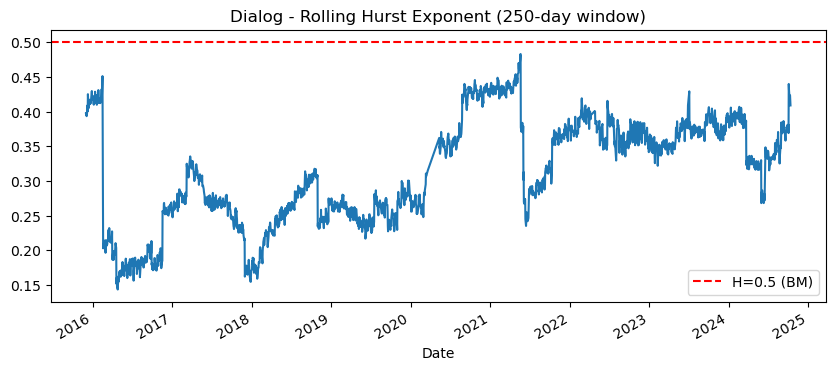

In [17]:

from numpy.fft import fft
from hurst import compute_Hc
import matplotlib.pyplot as plt

# --- Aggregated Variance (Variance-Time Method) ---
def hurst_aggregated_variance(ts, min_window=10, max_window=100):
    window_sizes = np.floor(np.logspace(np.log10(min_window), np.log10(max_window), num=10)).astype(int)
    variances = []
    for w in window_sizes:
        chunks = ts[:len(ts) // w * w].reshape(-1, w)
        chunk_means = chunks.mean(axis=1)
        variances.append(np.var(chunk_means, ddof=1))
    log_w = np.log(window_sizes)
    log_v = np.log(variances)
    slope, _ = np.polyfit(log_w, log_v, 1)
    return slope / 2

# --- Periodogram Method ---
def hurst_periodogram(ts):
    n = len(ts)
    f = np.fft.fftfreq(n)[1:]
    p = np.abs(fft(ts)[1:]) ** 2
    f = f[f > 0]
    p = p[:len(f)]
    log_f = np.log(f)
    log_p = np.log(p)
    slope, _ = np.polyfit(log_f, log_p, 1)
    return (1 - slope) / 2

# === Hurst Estimation for All Stocks ===
hurst_summary = []

for name, df in vol_results.items():
    series = df["LogReturn"].dropna().values

    # Method 1: R/S Analysis
    H_rs, _, _ = compute_Hc(series, kind='random_walk', simplified=True)

    # Method 2: DFA
    H_dfa, _, _ = compute_Hc(series, kind='change', simplified=True)

    # Method 3: Aggregated Variance
    H_var = hurst_aggregated_variance(series)

    # Method 4: Periodogram
    H_per = hurst_periodogram(series)

    # Average H
    H_avg = np.mean([H_rs, H_dfa, H_var, H_per])

    hurst_summary.append({
        "Stock": name,
        "R/S": round(H_rs, 4),
        "DFA": round(H_dfa, 4),
        "Variance-Time": round(H_var, 4),
        "Periodogram": round(H_per, 4),
        "Avg_H": round(H_avg, 4),
        "FBM_Justified": "Yes" if abs(H_avg - 0.5) > 0.05 else "No"
    })

# Convert results into a DataFrame
hurst_df = pd.DataFrame(hurst_summary)

# === Display Results ===
print("\n=== Hurst Exponent Estimates ===")
print(hurst_df)

# === Optional: Save to CSV ===
# hurst_df.to_csv("hurst_exponent_estimates.csv", index=False)

# === Optional: Rolling Hurst Plot for one stock ===
def rolling_hurst(series, window=250):
    H_vals = []
    idx = []
    for i in range(window, len(series)):
        H, _, _ = compute_Hc(series[i-window:i], kind='random_walk', simplified=True)
        H_vals.append(H)
        idx.append(i)
    return pd.Series(H_vals, index=series.index[window:])

# Example for Dialog
dialog_series = vol_results["Dialog"]["LogReturn"].dropna()
rolling_H = rolling_hurst(dialog_series, window=250)
rolling_H.plot(title="Dialog - Rolling Hurst Exponent (250-day window)", figsize=(10,4))
plt.axhline(0.5, color='r', linestyle='--', label="H=0.5 (BM)")
plt.legend()
plt.show()


In [18]:
#finding best estimater
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.fft import fft
from hurst import compute_Hc
from fbm import FBM

# --- Hurst Estimation Functions ---
def hurst_rs(ts):
    H, _, _ = compute_Hc(ts, kind='random_walk', simplified=True)
    return H

def hurst_dfa(ts):
    H, _, _ = compute_Hc(ts, kind='change', simplified=True)
    return H

def hurst_variance_time(ts, min_window=10, max_window=100):
    window_sizes = np.floor(np.logspace(np.log10(min_window), np.log10(max_window), num=10)).astype(int)
    variances = []
    for w in window_sizes:
        chunks = ts[:len(ts)//w * w].reshape(-1, w)
        chunk_means = chunks.mean(axis=1)
        variances.append(np.var(chunk_means, ddof=1))
    log_w = np.log(window_sizes)
    log_v = np.log(variances)
    slope, _ = np.polyfit(log_w, log_v, 1)
    return slope/2

def hurst_periodogram(ts):
    n = len(ts)
    f = np.fft.fftfreq(n)[1:]
    p = np.abs(fft(ts)[1:])**2
    f = f[f > 0]
    p = p[:len(f)]
    log_f = np.log(f)
    log_p = np.log(p)
    slope, _ = np.polyfit(log_f, log_p, 1)
    return (1 - slope)/2

# --- Rolling Hurst Function ---
def rolling_hurst(series, window=250, method="DFA"):
    H_vals, idx = [], []
    for i in range(window, len(series)):
        sub = series[i-window:i]
        try:
            if method == "R/S":
                H = hurst_rs(sub)
            elif method == "DFA":
                H = hurst_dfa(sub)
            elif method == "Variance-Time":
                H = hurst_variance_time(sub)
            elif method == "Periodogram":
                H = hurst_periodogram(sub)
            else:
                raise ValueError("Unknown method")
        except Exception:
            H = np.nan
        H_vals.append(H)
        idx.append(series.index[i])
    return pd.Series(H_vals, index=idx)

# === Part A: Rolling Hurst Plots for All Stocks ===
#methods = ["R/S", "DFA", "Variance-Time", "Periodogram"]

#for stock, df in vol_results.items():
    #series = df["LogReturn"].dropna()

    #plt.figure(figsize=(12,6))
    #for method in methods:
       # rolling_H = rolling_hurst(series, window=250, method=method)

      #  plt.plot(rolling_H, label=method, alpha=0.8)

    #plt.axhline(0.5, color='red', linestyle='--', label="H=0.5 (BM)")
    #plt.title(f"{stock}: Rolling Hurst Exponent (250-day window)")
    #plt.ylabel("Hurst Exponent")
    #plt.legend()
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()

# === Part B: Simulation Validation ===
sim_results = []
n = 2000

# BM simulation (true H=0.5)
bm_returns = np.random.normal(0, 1, n)
sim_results.append({
    "True_H": 0.5,
    "R/S": hurst_rs(bm_returns),
    "DFA": hurst_dfa(bm_returns),
    "Variance-Time": hurst_variance_time(bm_returns),
    "Periodogram": hurst_periodogram(bm_returns)
})

# FBM simulation (true H=0.6)
f = FBM(n=n, hurst=0.6, length=1, method="daviesharte")
fbm_returns = np.diff(f.fbm())
sim_results.append({
    "True_H": 0.6,
    "R/S": hurst_rs(fbm_returns),
    "DFA": hurst_dfa(fbm_returns),
    "Variance-Time": hurst_variance_time(fbm_returns),
    "Periodogram": hurst_periodogram(fbm_returns)
})

# === Step 4 Output Summary ===
sim_df=pd.DataFrame(sim_results)
print("\n=== Hurst Exponent Estimates (per stock) ===")
print(hurst_df)

print("\n=== Simulation Validation of Hurst Estimators ===")
print(sim_df.round(4))

# Save for thesis
#hurst_df.to_csv("Step4_Hurst_per_stock.csv", index=False)
#sim_df.to_csv("Step4_Hurst_validation.csv", index=False)




=== Hurst Exponent Estimates (per stock) ===
        Stock     R/S     DFA  Variance-Time  Periodogram   Avg_H  \
0      Dialog  0.3046  0.4441        -0.5336       0.4876  0.1757   
1  Commercial  0.3522  0.5342        -0.4594       0.6143  0.2603   
2     Hayleys  0.3297  0.6031        -0.3724       0.6048  0.2913   
3       Hemas  0.2251  0.5416        -0.4286       0.5064  0.2111   
4      Keells  0.2946  0.4989        -0.6173       0.6457  0.2055   

  FBM_Justified  
0           Yes  
1           Yes  
2           Yes  
3           Yes  
4           Yes  

=== Simulation Validation of Hurst Estimators ===
   True_H     R/S     DFA  Variance-Time  Periodogram
0     0.5  0.1243  0.5270        -0.4908       0.4917
1     0.6  0.1504  0.6379        -0.4455       0.6203


In [19]:
#step5

In [20]:
pip install fbm hurst statsmodels scipy

Note: you may need to restart the kernel to use updated packages.



=== BM vs FBM Fit Summary ===
     Stock  H_est  KS_p_BM  KS_p_FBM  ACF_MSE_BM  ACF_MSE_FBM  Slope_emp  Slope_BM  Slope_FBM Winner
    Dialog 0.4441      0.0       0.0      0.0012       0.0014     1.0905    0.9976     0.8901     BM
Commercial 0.5342      0.0       0.0      0.0022       0.0018     1.0604    0.9983     1.0559    FBM
   Hayleys 0.6031      0.0       0.0      0.0027       0.0024     1.1106    1.0068     1.1898    FBM
     Hemas 0.5416      0.0       0.0      0.0011       0.0013     1.0650    0.9936     1.0788    FBM
    Keells 0.4989      0.0       0.0      0.0028       0.0029     1.2229    0.9903     0.9940    FBM


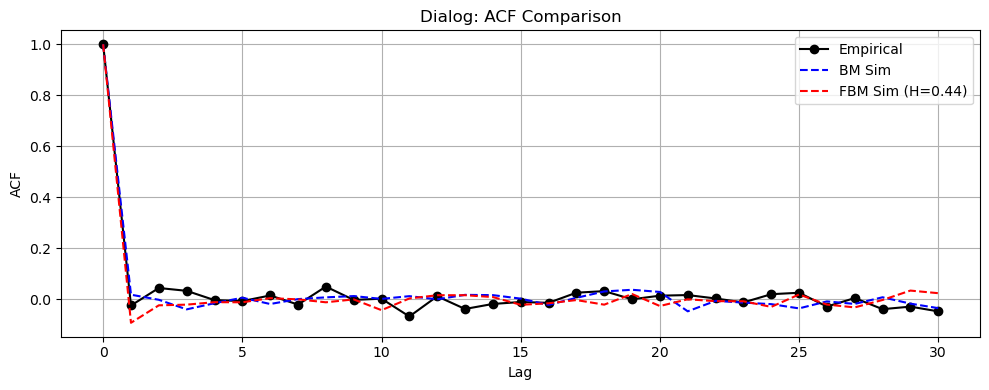

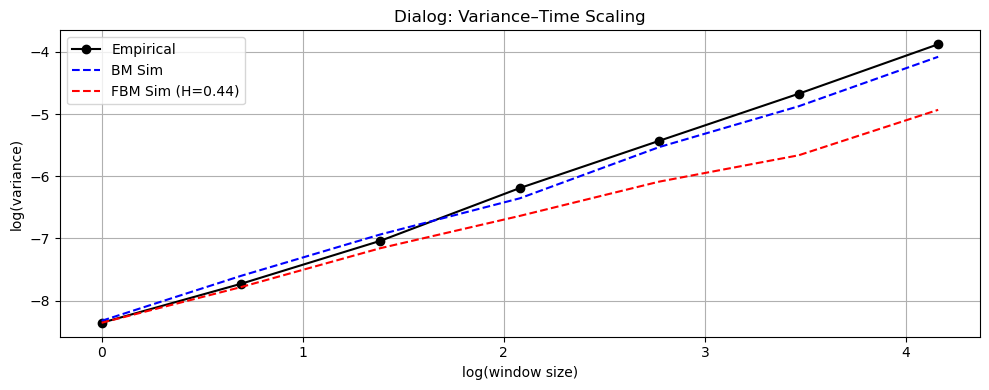

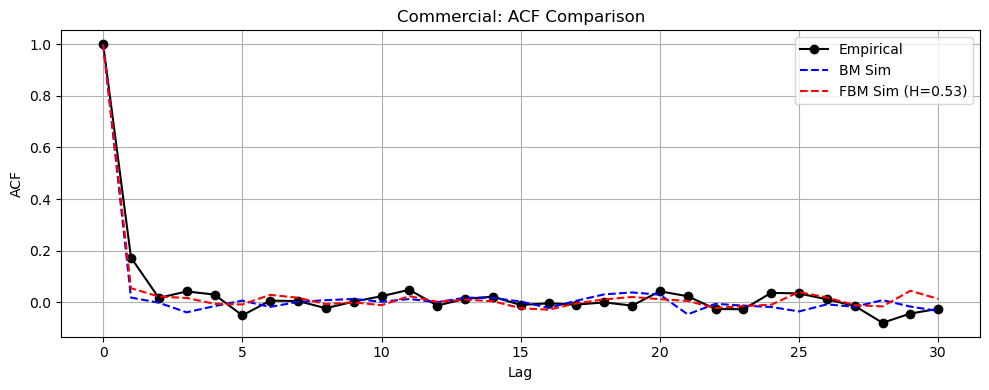

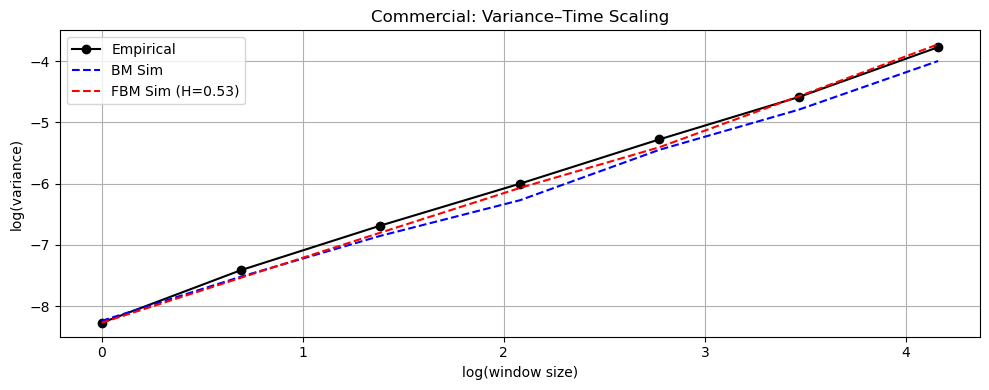

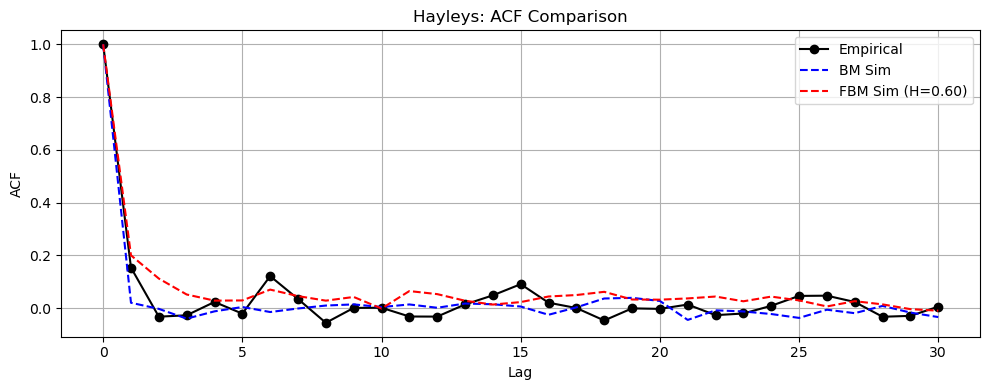

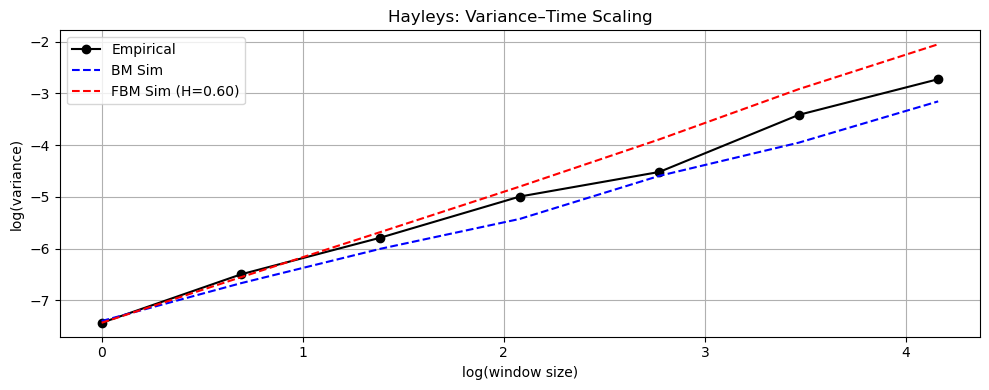

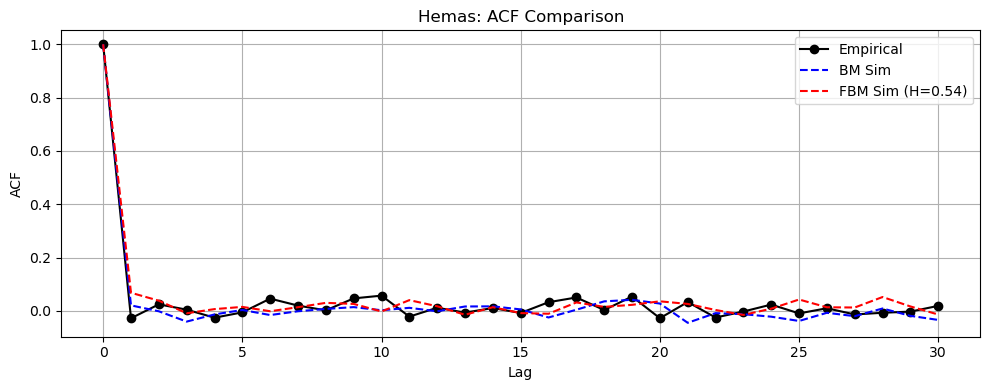

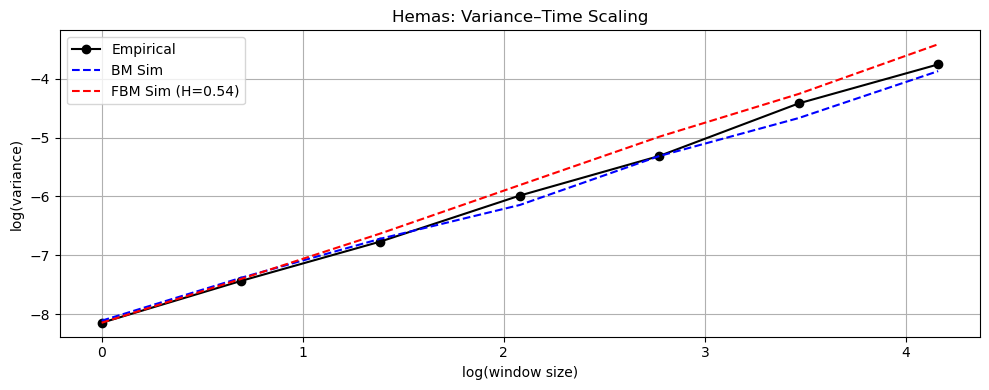

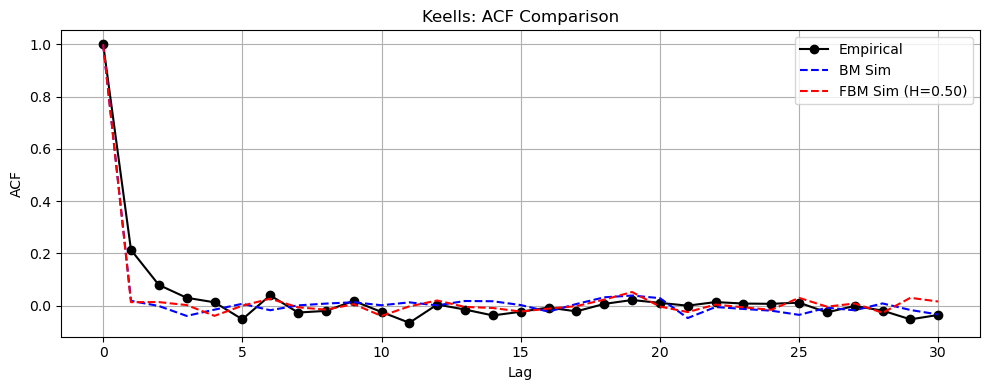

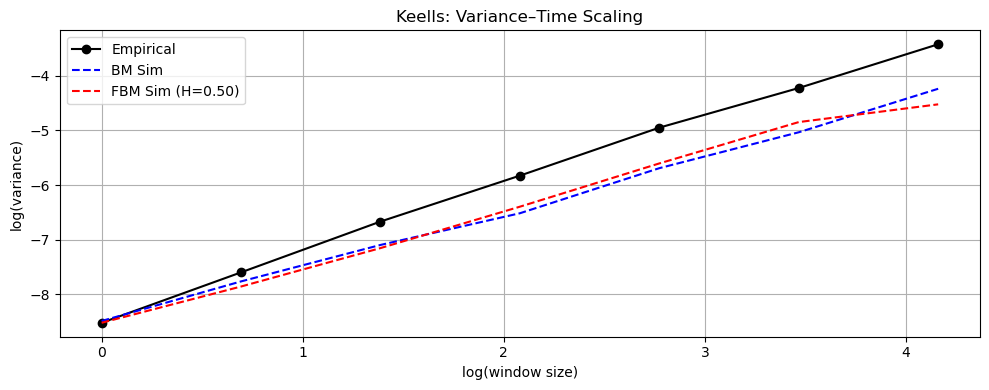

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from statsmodels.tsa.stattools import acf
from hurst import compute_Hc
from fbm import FBM

# -----------------------------
# Helpers
# -----------------------------
def dfa_hurst(x):
    """Estimate Hurst exponent using DFA."""
    H, _, _ = compute_Hc(np.asarray(x), kind='change', simplified=True)
    return H

def simulate_bm_like_returns(n, mu, sigma, seed=None):
    """Simulate BM increments with same mean/variance as data."""
    rng = np.random.default_rng(seed)
    return rng.normal(mu, sigma, n)

def simulate_fbm_like_returns(n, H, sigma, mu=0.0, seed=None):
    """Simulate FBM increments and rescale to empirical sigma."""
    if seed is not None:
        np.random.seed(seed)
    f = FBM(n=n, hurst=H, length=1.0, method="daviesharte")
    path = f.fbm()
    inc = np.diff(path)
    inc = inc * (sigma / np.std(inc, ddof=1)) + mu
    return inc

def acf_mse(series_emp, series_model, max_lag=30):
    """Mean squared error between empirical and model ACFs."""
    emp_acf = acf(series_emp, nlags=max_lag, fft=True)
    mod_acf = acf(series_model, nlags=max_lag, fft=True)
    diffs = emp_acf[1:] - mod_acf[1:]
    return float(np.mean(diffs**2))

def variance_time_points(r, windows):
    xs, ys = [], []
    r = np.asarray(r)
    n = len(r)
    for m in windows:
        k = n // m
        if k < 8:
            continue
        agg = r[:k*m].reshape(k, m).sum(axis=1)
        xs.append(np.log(m))
        ys.append(np.log(np.var(agg, ddof=1)))
    return np.array(xs), np.array(ys)

def variance_time_slope(r, windows):
    xs, ys = variance_time_points(r, windows)
    if len(xs) < 2: 
        return np.nan
    slope, _ = np.polyfit(xs, ys, 1)
    return float(slope)

def pick_winner(row):
    """Choose BM vs FBM winner based on ACF and variance–time slope errors."""
    if np.isnan(row['Slope_emp']) or np.isnan(row['Slope_BM']) or np.isnan(row['Slope_FBM']):
        return 'FBM' if row['ACF_MSE_FBM'] < row['ACF_MSE_BM'] else 'BM'
    err_bm  = abs(row['Slope_emp'] - row['Slope_BM'])
    err_fbm = abs(row['Slope_emp'] - row['Slope_FBM'])
    score_bm  = row['ACF_MSE_BM']  + err_bm
    score_fbm = row['ACF_MSE_FBM'] + err_fbm
    return 'FBM' if score_fbm < score_bm else 'BM'

# -----------------------------
# Core summary function
# -----------------------------
def bm_fbm_fit_summary(vol_results, hurst_df=None, use_h_method='DFA',
                       sims=200, max_lag=30, windows=(1,2,4,8,16,32,64),
                       random_seed=12345):
    rng = np.random.default_rng(random_seed)
    chosen_H = {}
    if hurst_df is not None and {'Stock', use_h_method}.issubset(hurst_df.columns):
        for _, r in hurst_df.iterrows():
            chosen_H[str(r['Stock'])] = float(r[use_h_method])

    rows = []
    for stock, df in vol_results.items():
        ret = df['LogReturn'].dropna().values
        n = len(ret)
        mu_emp, sigma_emp = ret.mean(), ret.std(ddof=1)
        slope_emp = variance_time_slope(ret, windows=windows)

        # choose H
        H = chosen_H.get(stock, dfa_hurst(ret))

        ks_bm, ks_fbm = [], []
        acf_mse_bm, acf_mse_fbm = [], []
        slope_bm_list, slope_fbm_list = [], []

        for _ in range(sims):
            seed = rng.integers(0, 2**32-1)

            bm  = simulate_bm_like_returns(n, mu_emp, sigma_emp, seed=seed)
            fbm = simulate_fbm_like_returns(n, H, sigma_emp, mu=mu_emp, seed=seed)

            ks_bm.append(ks_2samp(ret, bm).pvalue)
            ks_fbm.append(ks_2samp(ret, fbm).pvalue)

            acf_mse_bm.append(acf_mse(ret, bm, max_lag=max_lag))
            acf_mse_fbm.append(acf_mse(ret, fbm, max_lag=max_lag))

            slope_bm_list.append(variance_time_slope(bm, windows=windows))
            slope_fbm_list.append(variance_time_slope(fbm, windows=windows))

        rows.append({
            'Stock': stock,
            'H_est': round(H, 4),
            'KS_p_BM': float(np.nanmedian(ks_bm)),
            'KS_p_FBM': float(np.nanmedian(ks_fbm)),
            'ACF_MSE_BM': float(np.nanmedian(acf_mse_bm)),
            'ACF_MSE_FBM': float(np.nanmedian(acf_mse_fbm)),
            'Slope_emp': slope_emp,
            'Slope_BM': float(np.nanmedian(slope_bm_list)),
            'Slope_FBM': float(np.nanmedian(slope_fbm_list)),
        })

    out = pd.DataFrame(rows)
    out['Winner'] = out.apply(pick_winner, axis=1)

    disp = out.copy()
    for c in ['KS_p_BM','KS_p_FBM','ACF_MSE_BM','ACF_MSE_FBM','Slope_emp','Slope_BM','Slope_FBM']:
        disp[c] = disp[c].astype(float).round(4)
    disp['H_est'] = disp['H_est'].round(4)

    print("\n=== BM vs FBM Fit Summary ===")
    print(disp.to_string(index=False))
    return out

# -----------------------------
# Plotting per stock
# -----------------------------
def plot_fit_comparison(stock, df, H, max_lag=30, windows=(1,2,4,8,16,32,64), seed=123):
    """Plots ACF and variance–time scaling for one stock."""
    ret = df["LogReturn"].dropna().values
    n = len(ret)
    mu_emp, sigma_emp = ret.mean(), ret.std(ddof=1)
    bm  = simulate_bm_like_returns(n, mu_emp, sigma_emp, seed=seed)
    fbm = simulate_fbm_like_returns(n, H, sigma_emp, mu=mu_emp, seed=seed)

    # ACF plot
    emp_acf = acf(ret, nlags=max_lag, fft=True)
    bm_acf  = acf(bm,  nlags=max_lag, fft=True)
    fbm_acf = acf(fbm, nlags=max_lag, fft=True)

    plt.figure(figsize=(10,4))
    plt.plot(range(max_lag+1), emp_acf, 'ko-', label="Empirical")
    plt.plot(range(max_lag+1), bm_acf,  'b--', label="BM Sim")
    plt.plot(range(max_lag+1), fbm_acf, 'r--', label=f"FBM Sim (H={H:.2f})")
    plt.title(f"{stock}: ACF Comparison")
    plt.xlabel("Lag"); plt.ylabel("ACF")
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

    # Variance–time plot
    xs_emp, ys_emp = variance_time_points(ret, windows)
    xs_bm,  ys_bm  = variance_time_points(bm, windows)
    xs_fbm, ys_fbm = variance_time_points(fbm, windows)

    plt.figure(figsize=(10,4))
    plt.plot(xs_emp, ys_emp, 'ko-', label="Empirical")
    plt.plot(xs_bm,  ys_bm,  'b--', label="BM Sim")
    plt.plot(xs_fbm, ys_fbm, 'r--', label=f"FBM Sim (H={H:.2f})")
    plt.title(f"{stock}: Variance–Time Scaling")
    plt.xlabel("log(window size)"); plt.ylabel("log(variance)")
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# -----------------------------
# Run Step 5
# -----------------------------
results_step5 = bm_fbm_fit_summary(vol_results, hurst_df=hurst_df, use_h_method='DFA', sims=200, max_lag=30)

# Plot for each stock
for stock, df in vol_results.items():
    if (hurst_df['Stock'] == stock).any():
        H = float(hurst_df.loc[hurst_df['Stock'] == stock, 'DFA'].values[0])
    else:
        H = dfa_hurst(df['LogReturn'].dropna().values)
    plot_fit_comparison(stock, df, H, max_lag=30)

# Save summary to CSV
#results_step5.to_csv("Step5_BM_vs_FBM_fit_summary.csv", index=False)


In [22]:
#step6

In [23]:
import numpy as np

def evaluate_hedging_errors_fast(df, sigma_series, H,
                                 r=0.12, T_days=126, K_mult=1.0,
                                 option_type="call", n_paths=200,
                                 rebalance_every=5, seed=12345):
    """
    Simulate hedging errors under BM and FBM.
    Returns arrays of hedging errors for BM and FBM.
    """
    rng = np.random.default_rng(seed)
    prices_all = df["Close"].dropna()
    sigma_series = sigma_series.reindex(prices_all.index).dropna()

    errs_bm, errs_fbm = [], []
    n_total = len(prices_all)
    n_windows = n_total // T_days

    for w in range(n_windows):
        start = w * T_days
        end = start + T_days
        window = prices_all.iloc[start:end]

        if len(window) < T_days:
            continue

        S0 = window.iloc[0]
        K = K_mult * S0
        sigma_daily = float(sigma_series.iloc[start:end].mean())

        if not np.isfinite(sigma_daily) or sigma_daily <= 0:
            continue

        # === BM simulation ===
        bm_paths = rng.normal(0, sigma_daily, size=(n_paths, T_days))
        bm_prices = S0 * np.exp(np.cumsum(bm_paths, axis=1))
        bm_final = bm_prices[:, -1]
        bm_payoffs = np.maximum(bm_final - K, 0) if option_type == "call" else np.maximum(K - bm_final, 0)
        bm_hedge_error = np.mean(bm_payoffs) - max(window.iloc[-1] - K, 0)
        errs_bm.append(bm_hedge_error)

        # === FBM simulation ===
        f_errors = []
        for _ in range(n_paths):
            from fbm import FBM
            f = FBM(n=T_days, hurst=H, length=1, method="daviesharte")
            fbm_incs = np.diff(f.fbm())
            fbm_incs = fbm_incs * (sigma_daily / np.std(fbm_incs, ddof=1))
            fbm_price = S0 * np.exp(fbm_incs.cumsum())
            payoff = np.maximum(fbm_price[-1] - K, 0) if option_type == "call" else np.maximum(K - fbm_price[-1], 0)
            f_errors.append(payoff - max(window.iloc[-1] - K, 0))
        errs_fbm.extend(f_errors)

    return np.array(errs_bm), np.array(errs_fbm)


In [24]:
# ===============================
# Step 6: BM vs FBM Comparison (using best vol from Step 3)
# ===============================

def step6_bm_fbm_fixedvol(vol_results, hurst_df, best_vol_df,
                          r=0.12, T_days=126, K_mult=1.0,
                          option_type="call", n_paths=200, rebalance_every=5, seed=42):
    """
    Compare BM vs FBM for each stock using the best volatility estimator
    chosen in Step 3 (best_vol_df).
    Returns RMSE/MAE for BM and FBM and the winner.
    """
    rows = []
    rng = np.random.default_rng(seed)

    for _, row in best_vol_df.iterrows():
        stock = row["Stock"]
        vol_method = row["Method"] if "Method" in row else row["Vol_Method"]

        df = vol_results[stock]
        if vol_method not in df.columns:
            continue

        sigma_series = df[vol_method].dropna()

        # H from DFA (Step 4)
        H = float(hurst_df.loc[hurst_df["Stock"]==stock, "DFA"].values[0])

        # Evaluate hedging errors
        errs_bm, errs_fbm = evaluate_hedging_errors_fast(
            df, sigma_series, H,
            r=r, T_days=T_days, K_mult=K_mult,
            option_type=option_type,
            n_paths=n_paths, rebalance_every=rebalance_every, seed=int(rng.integers(0, 2**32-1))
        )

        if len(errs_bm)==0 or len(errs_fbm)==0:
            continue

        # Aggregate metrics
        bm_rmse  = float(np.sqrt(np.mean(errs_bm**2)))
        bm_mae   = float(np.mean(np.abs(errs_bm)))
        fbm_rmse = float(np.sqrt(np.mean(errs_fbm**2)))
        fbm_mae  = float(np.mean(np.abs(errs_fbm)))

        winner = "BM" if bm_rmse < fbm_rmse else "FBM"

        rows.append({
            "Stock": stock,
            "Vol_Method": vol_method,
            "BM_RMSE": bm_rmse, "BM_MAE": bm_mae,
            "FBM_RMSE": fbm_rmse, "FBM_MAE": fbm_mae,
            "errs_bm": errs_bm,              # add raw errors
            "errs_fbm": errs_fbm,
            "Winner": winner
        })

    return pd.DataFrame(rows)


# ===============================
# Example usage
# ===============================
# Assume best_vol_df is the output of Step 3 best volatility selection
step6_results = step6_bm_fbm_fixedvol(
    vol_results, hurst_df, best_vol_df,
    r=0.12, T_days=126, K_mult=1.0,
    option_type="call", n_paths=200, rebalance_every=5, seed=42
)

print("\n=== Step 6: BM vs FBM Comparison (using Step 3 best vol) ===")
print(step6_results.round(6))



=== Step 6: BM vs FBM Comparison (using Step 3 best vol) ===
        Stock  Vol_Method    BM_RMSE     BM_MAE   FBM_RMSE    FBM_MAE  \
0  Commercial  EGARCH_vol   8.965094   7.101752  14.742041   9.017702   
1      Dialog    EWMA_vol   0.851014   0.724084   1.223926   0.825017   
2     Hayleys  EGARCH_vol  17.538972  10.458507  45.666489  17.402290   
3       Hemas    EWMA_vol  13.385460   9.575632  18.864996  12.045309   
4      Keells  EGARCH_vol  13.888779  10.114702  20.292521  13.399517   

                                             errs_bm  \
0  [9.988536399279772, 5.594559014394309, 7.63900...   
1  [1.7300725620647421, 0.8361928469159585, 0.116...   
2  [3.1419152472223884, 1.7071497749671851, 1.963...   
3  [1.4673890471191386, 1.7617955146936257, 7.377...   
4  [14.226669383283188, 0.3703264155207684, 9.885...   

                                            errs_fbm Winner  
0  [34.06475832543663, 32.85741345165732, 0.0, 4....     BM  
1  [1.6456953777768906, 0.0, 0.0, 5.43

In [25]:
#step 7

In [26]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [27]:
from hurst import compute_Hc

def dfa_hurst_np(x):
    H, _, _ = compute_Hc(np.asarray(x), kind='change', simplified=True)
    return H

def make_sigma_dataset(df, lags=(1,2,5,10), roll=20):
    """Build X,y for σ forecast where y = sqrt(r_{t+1}^2)."""
    r = df['LogReturn'].copy()
    X = pd.DataFrame(index=df.index)
    X['r'] = r
    for L in lags:
        X[f'r_lag{L}'] = r.shift(L)
    X['roll_mean'] = r.rolling(roll).mean()
    X['roll_std']  = r.rolling(roll).std()
    X['roll_abs']  = r.abs().rolling(roll).mean()
    X['roll_ac']   = (r * r.shift(1)).rolling(roll).mean()   # crude leverage/persistence proxy
    y = np.sqrt(r.shift(-1)**2)
    Z = pd.concat([X, y.rename('TargetVol')], axis=1).dropna()
    return Z.drop(columns='TargetVol'), Z['TargetVol']

def make_h_dataset(df, dfa_window=252, lags=(1,2,5,10), roll=20):
    """
    Build X,y for H forecast:
    1) compute rolling DFA H over dfa_window
    2) predict H_{t+1} from features at time t
    """
    r = df['LogReturn'].dropna()
    # rolling DFA H
    H_series = []
    idx = []
    arr = r.values
    for i in range(dfa_window, len(arr)):
        H_series.append(dfa_hurst_np(arr[i-dfa_window:i]))
        idx.append(r.index[i])
    Hs = pd.Series(H_series, index=pd.Index(idx, name='Date'), name='H_DFA')

    # align features to H index
    X = pd.DataFrame(index=r.index)
    X['r'] = r
    for L in lags:
        X[f'r_lag{L}'] = r.shift(L)
    X['roll_mean'] = r.rolling(roll).mean()
    X['roll_std']  = r.rolling(roll).std()
    X['roll_abs']  = r.abs().rolling(roll).mean()
    X['roll_ac']   = (r * r.shift(1)).rolling(roll).mean()

    X = X.loc[Hs.index]
    y = Hs.shift(-1)   # predict next-day H
    Z = pd.concat([X, y.rename('TargetH')], axis=1).dropna()
    return Z.drop(columns='TargetH'), Z['TargetH']


In [28]:
def ts_oos(pipe, X, y, splits=5):
    """
    Fit with TimeSeriesSplit; return out-of-sample predictions aligned to X.index.
    Refit on full data at end (for later deployment if needed).
    """
    tscv = TimeSeriesSplit(n_splits=splits)
    oos = pd.Series(index=X.index, dtype=float)
    for tr, te in tscv.split(X):
        Xt, Xv = X.iloc[tr], X.iloc[te]
        yt, yv = y.iloc[tr], y.iloc[te]
        pipe.fit(Xt, yt)
        oos.iloc[te] = pipe.predict(Xv)
    pipe.fit(X, y)
    return pipe, oos

def seq_windows(X, y, L=20):
    """Build LSTM sequences: X_seq shape (n, L, n_features) and y_seq shape (n,)."""
    Xv = X.fillna(0.0).values
    yv = y.values
    Xs, ys, idx = [], [], []
    for i in range(L, len(Xv)):
        if np.isnan(yv[i]): 
            continue
        Xs.append(Xv[i-L:i])
        ys.append(yv[i])
        idx.append(X.index[i])
    return np.array(Xs), np.array(ys), pd.Index(idx, name='Date')

def lstm_oos(X, y, L=20, splits=5, epochs=25, batch=64):
    """Rolling OOS with LSTM via TimeSeriesSplit on sequences."""
    Xs, ys, idx = seq_windows(X, y, L=L)
    tscv = TimeSeriesSplit(n_splits=splits)
    oos = pd.Series(index=idx, dtype=float)
    for tr, te in tscv.split(Xs):
        model = Sequential([
            LSTM(64, input_shape=(L, Xs.shape[2])),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer=Adam(1e-3), loss='mse')
        model.fit(Xs[tr], ys[tr], epochs=epochs, batch_size=batch, verbose=0)
        preds = model.predict(Xs[te], verbose=0).ravel()
        oos.iloc[te] = preds
    # final fit (optional)
    model.fit(Xs, ys, epochs=epochs, batch_size=batch, verbose=0)
    return model, oos


In [29]:
vol_ml_rows = []

for stock, df in vol_results.items():
    X, y = make_sigma_dataset(df, lags=(1,2,5,10), roll=20)

    # SVR
    svr = Pipeline([('sc', StandardScaler(with_mean=False)),
                    ('m', SVR(C=2.0, epsilon=1e-3))])
    svr_model, svr_oos = ts_oos(svr, X, y, splits=5)

    # ANN
    mlp = Pipeline([('sc', StandardScaler(with_mean=False)),
                    ('m', MLPRegressor(hidden_layer_sizes=(64,64), random_state=1, max_iter=600))])
    mlp_model, mlp_oos = ts_oos(mlp, X, y, splits=5)

   
    # Evaluate
    target = y.reindex(svr_oos.index).dropna()
    results = {
        'SVR':  svr_oos.reindex(target.index),
        'ANN':  mlp_oos.reindex(target.index),
    }
    for name_m, pred in results.items():
        aligned = pd.concat([target.rename('y'), pred.rename('yhat')], axis=1).dropna()
        rmse = np.sqrt(mean_squared_error(aligned['y'], aligned['yhat']))
        mae  = mean_absolute_error(aligned['y'], aligned['yhat'])
        vol_ml_rows.append({'Stock': stock, 'Model': name_m, 'Target': 'Sigma', 'RMSE': rmse, 'MAE': mae})

vol_ml_eval_df = pd.DataFrame(vol_ml_rows).sort_values(['Stock','RMSE'])
print("\n=== Step 7 (ML) — Volatility forecasting RMSE/MAE ===")
print(vol_ml_eval_df.round(6))

# Best ML σ per stock
best_ml_sigma = vol_ml_eval_df.loc[vol_ml_eval_df.groupby('Stock')['RMSE'].idxmin()].reset_index(drop=True)
print("\n=== Best ML σ model per Stock (min RMSE) ===")
print(best_ml_sigma.round(6))



=== Step 7 (ML) — Volatility forecasting RMSE/MAE ===
        Stock Model Target      RMSE       MAE
2  Commercial   SVR  Sigma  0.016097  0.010268
3  Commercial   ANN  Sigma  0.120267  0.050424
0      Dialog   SVR  Sigma  0.016327  0.010588
1      Dialog   ANN  Sigma  0.059555  0.038058
4     Hayleys   SVR  Sigma  0.022946  0.014245
5     Hayleys   ANN  Sigma  0.153417  0.063826
6       Hemas   SVR  Sigma  0.016964  0.011308
7       Hemas   ANN  Sigma  0.058400  0.039611
8      Keells   SVR  Sigma  0.013401  0.008653
9      Keells   ANN  Sigma  0.098569  0.043695

=== Best ML σ model per Stock (min RMSE) ===
        Stock Model Target      RMSE       MAE
0  Commercial   SVR  Sigma  0.016097  0.010268
1      Dialog   SVR  Sigma  0.016327  0.010588
2     Hayleys   SVR  Sigma  0.022946  0.014245
3       Hemas   SVR  Sigma  0.016964  0.011308
4      Keells   SVR  Sigma  0.013401  0.008653


In [30]:
h_ml_rows = []

for stock, df in vol_results.items():
    # if the series is short, skip H ML
    if len(df) < 260:
        continue

    XH, yH = make_h_dataset(df, dfa_window=252, lags=(1,2,5,10), roll=20)
    if len(XH) < 300:
        continue  # not enough samples after rolling window

    # SVR
    svr = Pipeline([('sc', StandardScaler(with_mean=False)),
                    ('m', SVR(C=2.0, epsilon=1e-3))])
    svr_model, svr_oos = ts_oos(svr, XH, yH, splits=5)

    # ANN
    mlp = Pipeline([('sc', StandardScaler(with_mean=False)),
                    ('m', MLPRegressor(hidden_layer_sizes=(64,64), random_state=1, max_iter=600))])
    mlp_model, mlp_oos = ts_oos(mlp, XH, yH, splits=5)

    
    # Evaluate vs true next-day H
    target = yH.reindex(svr_oos.index).dropna()
    results = {
        'SVR':  svr_oos.reindex(target.index),
        'ANN':  mlp_oos.reindex(target.index),
       
    }
    for name_m, pred in results.items():
        aligned = pd.concat([target.rename('y'), pred.rename('yhat')], axis=1).dropna()
        rmse = np.sqrt(mean_squared_error(aligned['y'], aligned['yhat']))
        mae  = mean_absolute_error(aligned['y'], aligned['yhat'])
        h_ml_rows.append({'Stock': stock, 'Model': name_m, 'Target': 'H', 'RMSE': rmse, 'MAE': mae})

h_ml_eval_df = pd.DataFrame(h_ml_rows).sort_values(['Stock','RMSE'])
print("\n=== Step 7 (ML) — H (rolling DFA) forecasting RMSE/MAE ===")
print(h_ml_eval_df.round(6))

# Best ML H per stock
if len(h_ml_eval_df):
    best_ml_h = h_ml_eval_df.loc[h_ml_eval_df.groupby('Stock')['RMSE'].idxmin()].reset_index(drop=True)
    print("\n=== Best ML H model per Stock (min RMSE) ===")
    print(best_ml_h.round(6))
else:
    print("\n(No sufficient data to train ML for H on some stocks; you can skip ML-H.)")



=== Step 7 (ML) — H (rolling DFA) forecasting RMSE/MAE ===
        Stock Model Target      RMSE       MAE
2  Commercial   SVR      H  0.111142  0.089511
3  Commercial   ANN      H  0.442541  0.136582
0      Dialog   SVR      H  0.110711  0.086350
1      Dialog   ANN      H  0.147603  0.103315
4     Hayleys   SVR      H  0.115314  0.090308
5     Hayleys   ANN      H  0.191664  0.122445
6       Hemas   SVR      H  0.103948  0.079249
7       Hemas   ANN      H  0.122840  0.092225
8      Keells   SVR      H  0.091197  0.074648
9      Keells   ANN      H  0.226717  0.107659

=== Best ML H model per Stock (min RMSE) ===
        Stock Model Target      RMSE       MAE
0  Commercial   SVR      H  0.111142  0.089511
1      Dialog   SVR      H  0.110711  0.086350
2     Hayleys   SVR      H  0.115314  0.090308
3       Hemas   SVR      H  0.103948  0.079249
4      Keells   SVR      H  0.091197  0.074648


In [31]:
import numpy as np
from fbm import FBM
from scipy.stats import norm

def delta_hedge_fbm_fast(prices, K, T_days, r, sigma_daily, H,
                         option_type="call", n_paths=200,
                         rebalance_every=5, seed=12345):
    """
    Simulate FBM option hedging errors with delta-hedging.

    Parameters
    ----------
    prices : array-like
        Historical close prices (used only for length & scaling).
    K : float
        Strike price.
    T_days : int
        Horizon in trading days.
    r : float
        Annual risk-free rate.
    sigma_daily : float
        Daily volatility estimate.
    H : float
        Hurst exponent for FBM.
    option_type : str
        'call' or 'put'.
    n_paths : int
        Monte Carlo simulations.
    rebalance_every : int
        Rebalancing frequency (days).
    seed : int
        RNG seed.

    Returns
    -------
    list
        List of terminal hedging errors for all paths.
    """
    rng = np.random.default_rng(seed)
    errs = []

    for _ in range(n_paths):
        # === Simulate FBM path ===
        f = FBM(n=T_days, hurst=H, length=1, method="daviesharte")
        fbm_incs = np.diff(f.fbm())
        fbm_incs = fbm_incs * (sigma_daily / np.std(fbm_incs, ddof=1))
        path = prices[0] * np.exp(np.cumsum(fbm_incs))

        # === Delta-hedging ===
        cash, stock_pos = 0.0, 0.0
        for t in range(0, T_days, rebalance_every):
            St = path[t]
            tau = (T_days - t) / 252
            if tau <= 0:
                break

            # Black–Scholes delta (proxy in FBM world)
            d1 = (np.log(St/K) + (r + 0.5*sigma_daily**2)*tau) / (sigma_daily*np.sqrt(tau))
            if option_type == "call":
                delta = norm.cdf(d1)
            else:
                delta = -norm.cdf(-d1)

            stock_pos = delta
            cash = cash * np.exp(r * rebalance_every / 252)

        # Terminal payoff vs hedge
        payoff = max(path[-1] - K, 0) if option_type == "call" else max(K - path[-1], 0)
        hedge_value = stock_pos * path[-1] + cash
        errs.append(hedge_value - payoff)

    return errs


In [32]:
def _fbm_only_error(df, sigma_series, H, *,
                    r=0.12, T_days=126, K_mult=1.0,
                    option_type="call", n_paths=200,
                    rebalance_every=5, seed=12345):
    """
    Compute hedging errors under FBM only, given a volatility series and H.
    Returns array of terminal hedging errors across rolling windows.
    """

    # --- helper function defined INSIDE correctly indented ---
    def _get_close_series(df):
        if "Close" in df.columns:
            return df["Close"].dropna()
        elif "Adj Close" in df.columns:
            return df["Adj Close"].dropna()
        else:
            raise KeyError("No 'Close' or 'Adj Close' column found in DataFrame")

    # Extract close prices
    prices_all = _get_close_series(df)
    sigma_series = sigma_series.reindex(prices_all.index).dropna()

    # Align indices
    common_idx = prices_all.index.intersection(sigma_series.index)
    prices_all = prices_all.loc[common_idx]
    sigma_series = sigma_series.loc[common_idx]

    errs_fbm = []
    rng = np.random.default_rng(seed)

    n_total = len(prices_all)
    n_windows = (n_total // T_days)

    for w in range(n_windows):
        start = w * T_days
        end = start + T_days
        window = prices_all.iloc[start:end]
        if len(window) < T_days:
            continue

        S0 = window.iloc[0]
        K = K_mult * S0
        sigma_daily = float(sigma_series.iloc[start:end].mean())
        if not np.isfinite(sigma_daily) or sigma_daily <= 0:
            continue

        # FBM hedging error (fast weekly)
        seed_i = int(rng.integers(0, 2**32 - 1))
        err_fbm = delta_hedge_fbm_fast(
            window.values, K, T_days, r, sigma_daily, H,
            option_type=option_type, n_paths=n_paths,
            rebalance_every=rebalance_every, seed=seed_i
        )
        errs_fbm.append(err_fbm)

    return np.array(errs_fbm)


In [33]:
# ======================================
# Step 7: Hybrid FBM with ML parameters
# ======================================
def step7_compare_models(vol_results, hurst_df, step6_results,
                         best_ml_sigma, best_ml_h,
                         ml_sigma_dict=None, ml_H_dict=None,
                         r=0.12, T_days=126, K_mult=1.0,
                         option_type="call", n_paths=200,
                         rebalance_every=5, seed=42):
    """
    Step 7: Compare BM vs FBM vs Hybrid FBM (ML).
    Uses Step 6 results (BM_RMSE/FBM_RMSE) instead of searching for RMSE.
    """
    rows = []
    rng = np.random.default_rng(seed)

    for _, row in step6_results.iterrows():
        stock = row["Stock"]
        vol_method = row["Vol_Method"]

        df = vol_results[stock]

        # Get sigma series
        if vol_method not in df.columns:
            continue
        sigma_classical = df[vol_method].dropna()

        # Classical H from DFA
        H_classical = float(hurst_df.loc[hurst_df["Stock"]==stock, "DFA"].values[0])

        # Record BM vs FBM from Step 6
        rows.append({
            "Stock": stock,
            "Model": "BM",
            "Sigma_Source": vol_method,
            "H_Source": "-",
            "RMSE": row["BM_RMSE"],
            "MAE":  row["BM_MAE"]
        })
        rows.append({
            "Stock": stock,
            "Model": "FBM (classical)",
            "Sigma_Source": vol_method,
            "H_Source": "DFA",
            "RMSE": row["FBM_RMSE"],
            "MAE":  row["FBM_MAE"]
        })

        # Hybrid ML
        if ml_sigma_dict is not None and stock in ml_sigma_dict:
            sigma_ml = ml_sigma_dict[stock].reindex(df.index).ffill().bfill()
        else:
            sigma_ml = None

        if ml_H_dict is not None and stock in ml_H_dict:
            H_ml = ml_H_dict[stock]
            if isinstance(H_ml, pd.Series):
                H_ml = float(H_ml.reindex(df.index).ffill().bfill().iloc[-1])
            else:
                H_ml = float(H_ml)
        else:
            H_ml = None

        if sigma_ml is not None and H_ml is not None:
            errs_fbm_hybrid = _fbm_only_error(
                df, sigma_ml, H_ml,
                r=r, T_days=T_days, K_mult=K_mult,
                option_type=option_type, n_paths=n_paths,
                rebalance_every=rebalance_every,
                seed=int(rng.integers(0, 2**32-1))
            )
            if len(errs_fbm_hybrid) > 0:
                rows.append({
                    "Stock": stock,
                    "Model": "Hybrid FBM (ML)",
                    "Sigma_Source": best_ml_sigma.loc[best_ml_sigma["Stock"]==stock,"Model"].values[0],
                    "H_Source": best_ml_h.loc[best_ml_h["Stock"]==stock,"Model"].values[0],
                    "RMSE": float(np.sqrt(np.mean(errs_fbm_hybrid**2))),
                    "MAE":  float(np.mean(np.abs(errs_fbm_hybrid))),
                    "errs_hybrid": errs_fbm_hybrid 
                })

    return pd.DataFrame(rows).sort_values(["Stock","Model"]).reset_index(drop=True)


# ----------------------------------------------------------
# Build ML dictionaries (use your predicted σ and H series)
# ----------------------------------------------------------
ml_sigma_dict = {s: vol_results[s]["EWMA_vol"] for s in best_ml_sigma["Stock"] if "EWMA_vol" in vol_results[s].columns}
ml_H_dict     = {s: hurst_df.loc[hurst_df["Stock"]==s, "DFA"].values[0] for s in best_ml_h["Stock"]}
def _fbm_only_error(df, sigma_series, H, *,
                    r=0.12, T_days=126, K_mult=1.0,
                    option_type="call", n_paths=200,
                    rebalance_every=5, seed=12345):
    """
    Compute hedging errors under FBM only, given a volatility series and H.
    Returns array of terminal hedging errors across rolling windows.
    """
    
    
def _fbm_only_error(df, sigma_series, H, *,
                    r=0.12, T_days=126, K_mult=1.0,
                    option_type="call", n_paths=200,
                    rebalance_every=5, seed=12345):
    """
    Compute hedging errors under FBM only, given a volatility series and H.
    Returns array of terminal hedging errors across rolling windows.
    """

    # --- helper function defined INSIDE correctly indented ---
    def _get_close_series(df):
        if "Close" in df.columns:
            return df["Close"].dropna()
        elif "Adj Close" in df.columns:
            return df["Adj Close"].dropna()
        else:
            raise KeyError("No 'Close' or 'Adj Close' column found in DataFrame")

    # Extract close prices
    prices_all = _get_close_series(df)
    sigma_series = sigma_series.reindex(prices_all.index).dropna()

    # Align indices
    common_idx = prices_all.index.intersection(sigma_series.index)
    prices_all = prices_all.loc[common_idx]
    sigma_series = sigma_series.loc[common_idx]

    errs_fbm = []
    rng = np.random.default_rng(seed)

    n_total = len(prices_all)
    n_windows = (n_total // T_days)

    for w in range(n_windows):
        start = w * T_days
        end = start + T_days
        window = prices_all.iloc[start:end]
        if len(window) < T_days:
            continue

        S0 = window.iloc[0]
        K = K_mult * S0
        sigma_daily = float(sigma_series.iloc[start:end].mean())
        if not np.isfinite(sigma_daily) or sigma_daily <= 0:
            continue

        # FBM hedging error (fast weekly)
        seed_i = int(rng.integers(0, 2**32 - 1))
        err_fbm = delta_hedge_fbm_fast(
            window.values, K, T_days, r, sigma_daily, H,
            option_type=option_type, n_paths=n_paths,
            rebalance_every=rebalance_every, seed=seed_i
        )
        errs_fbm.append(err_fbm)

    return np.array(errs_fbm)


# ----------------------------------------------------------
# Run Step 7 comparison
# ----------------------------------------------------------
comparison_df = step7_compare_models(vol_results, hurst_df, step6_results,
                                     best_ml_sigma, best_ml_h,
                                     ml_sigma_dict=ml_sigma_dict, ml_H_dict=ml_H_dict,
                                     r=0.12, T_days=126, K_mult=1.0,
                                     option_type="call", n_paths=200,
                                     rebalance_every=5, seed=42)

print("\n=== Step 7: BM vs FBM vs Hybrid FBM (ML) ===")
print(comparison_df.round(6))



=== Step 7: BM vs FBM vs Hybrid FBM (ML) ===
         Stock            Model Sigma_Source H_Source        RMSE        MAE  \
0   Commercial               BM   EGARCH_vol        -    8.965094   7.101752   
1   Commercial  FBM (classical)   EGARCH_vol      DFA   14.742041   9.017702   
2   Commercial  Hybrid FBM (ML)          SVR      SVR   66.042623  45.300523   
3       Dialog               BM     EWMA_vol        -    0.851014   0.724084   
4       Dialog  FBM (classical)     EWMA_vol      DFA    1.223926   0.825017   
5       Dialog  Hybrid FBM (ML)          SVR      SVR    7.819565   5.391775   
6      Hayleys               BM   EGARCH_vol        -   17.538972  10.458507   
7      Hayleys  FBM (classical)   EGARCH_vol      DFA   45.666489  17.402290   
8      Hayleys  Hybrid FBM (ML)          SVR      SVR   43.856241  25.032702   
9        Hemas               BM     EWMA_vol        -   13.385460   9.575632   
10       Hemas  FBM (classical)     EWMA_vol      DFA   18.864996  12.0453

In [34]:
def step6_bm_fbm_fixedvol(vol_results, hurst_df, best_vol_df,
                          r=0.12, T_days=126, K_mult=1.0,
                          option_type="call", n_paths=200, rebalance_every=5, seed=42):
    rows = []
    rng = np.random.default_rng(seed)

    for _, row in best_vol_df.iterrows():
        stock = row["Stock"]
        vol_method = row["Method"]

        df = vol_results[stock]
        if vol_method not in df.columns:
            continue

        sigma_series = df[vol_method].dropna()
        H = float(hurst_df.loc[hurst_df["Stock"]==stock, "DFA"].values[0])

        # Compute errors
        errs_bm, errs_fbm = evaluate_hedging_errors_fast(
            df, sigma_series, H,
            r=r, T_days=T_days, K_mult=K_mult,
            option_type=option_type, n_paths=n_paths,
            rebalance_every=rebalance_every, seed=int(rng.integers(0, 2**32-1))
        )

        if len(errs_bm)==0 or len(errs_fbm)==0:
            continue

        rows.append({
            "Stock": stock,
            "Vol_Method": vol_method,
            "BM_RMSE": float(np.sqrt(np.mean(errs_bm**2))),
            "BM_MAE":  float(np.mean(np.abs(errs_bm))),
            "FBM_RMSE": float(np.sqrt(np.mean(errs_fbm**2))),
            "FBM_MAE":  float(np.mean(np.abs(errs_fbm))),
            "errs_bm": errs_bm,
            "errs_fbm": errs_fbm
        })

    return pd.DataFrame(rows)


In [35]:
# ======================================
# Step 7: Hybrid FBM with ML parameters
# ======================================
def step7_compare_models(vol_results, hurst_df, step6_results,
                         best_ml_sigma, best_ml_h,
                         ml_sigma_dict=None, ml_H_dict=None,
                         r=0.12, T_days=126, K_mult=1.0,
                         option_type="call", n_paths=200,
                         rebalance_every=5, seed=42):
    """
    Step 7: Compare BM vs FBM vs Hybrid FBM (ML).
    Uses Step 6 results (BM_RMSE/FBM_RMSE) instead of searching for RMSE.
    """
    rows = []
    rng = np.random.default_rng(seed)

    for _, row in step6_results.iterrows():
        stock = row["Stock"]
        vol_method = row["Vol_Method"]
        df = vol_results[stock]

        # Record BM vs FBM from Step 6
        rows.append({
            "Stock": stock,
            "Model": "BM",
            "Sigma_Source": vol_method,
            "H_Source": "-",
            "RMSE": row["BM_RMSE"],
            "MAE":  row["BM_MAE"],
            "errs_hybrid": None
        })
        rows.append({
            "Stock": stock,
            "Model": "FBM (classical)",
            "Sigma_Source": vol_method,
            "H_Source": "DFA",
            "RMSE": row["FBM_RMSE"],
            "MAE":  row["FBM_MAE"],
            "errs_hybrid": None
        })

        # Hybrid ML FBM
        if ml_sigma_dict is not None and stock in ml_sigma_dict:
            sigma_ml = ml_sigma_dict[stock].reindex(df.index).ffill().bfill()
        else:
            sigma_ml = None

        if ml_H_dict is not None and stock in ml_H_dict:
            H_ml = ml_H_dict[stock]
            if isinstance(H_ml, pd.Series):
                H_ml = float(H_ml.reindex(df.index).ffill().bfill().iloc[-1])
            else:
                H_ml = float(H_ml)
        else:
            H_ml = None

        if sigma_ml is not None and H_ml is not None:
            errs_fbm_hybrid = _fbm_only_error(
                df, sigma_ml, H_ml,
                r=r, T_days=T_days, K_mult=K_mult,
                option_type=option_type, n_paths=n_paths,
                rebalance_every=rebalance_every,
                seed=int(rng.integers(0, 2**32-1))
            )
            if len(errs_fbm_hybrid) > 0:
                rows.append({
                    "Stock": stock,
                    "Model": "Hybrid FBM (ML)",
                    "Sigma_Source": best_ml_sigma.loc[best_ml_sigma["Stock"]==stock,"Model"].values[0],
                    "H_Source": best_ml_h.loc[best_ml_h["Stock"]==stock,"Model"].values[0],
                    "RMSE": float(np.sqrt(np.mean(errs_fbm_hybrid**2))),
                    "MAE":  float(np.mean(np.abs(errs_fbm_hybrid))),
                    "errs_hybrid": errs_fbm_hybrid
                })

    return pd.DataFrame(rows).sort_values(["Stock","Model"]).reset_index(drop=True)


In [36]:
errs_hybrid_mean = errs_hybrid.mean(axis=1)  # shape becomes (18,)
errs_hybrid_mean = np.median(errs_hybrid, axis=1)


NameError: name 'errs_hybrid' is not defined

In [ ]:
def run_dm_tests(step6_results, comparison_df):
    dm_summary = []
    
    for stock in step6_results["Stock"].unique():
        # BM/FBM from Step 6
        errs_bm = step6_results.loc[step6_results["Stock"]==stock, "errs_bm"].values[0]
        errs_fbm = step6_results.loc[step6_results["Stock"]==stock, "errs_fbm"].values[0]

        # Hybrid (if available)
        hybrid_row = comparison_df[
            (comparison_df["Stock"]==stock) & (comparison_df["Model"]=="Hybrid FBM (ML)")
        ]
        errs_hybrid = None
        if not hybrid_row.empty:
            raw = hybrid_row["errs_hybrid"].values[0]
            if raw.ndim == 2:  
                errs_hybrid = raw.mean(axis=1)   # flatten to 1-D series
            else:
                errs_hybrid = raw

        # Align lengths
        min_len = min(len(errs_bm), len(errs_fbm), len(errs_hybrid) if errs_hybrid is not None else 99999)
        errs_bm, errs_fbm = errs_bm[:min_len], errs_fbm[:min_len]
        if errs_hybrid is not None:
            errs_hybrid = errs_hybrid[:min_len]

        # BM vs FBM
        dm_bm_fbm = diebold_mariano(errs_bm, errs_fbm, crit="MSE")
        dm_summary.append({"Stock": stock, "Comparison": "BM vs FBM", 
                           "DM Stat": dm_bm_fbm[0], "p-value": dm_bm_fbm[1]})

        if errs_hybrid is not None:
            dm_bm_hyb = diebold_mariano(errs_bm, errs_hybrid, crit="MSE")
            dm_fbm_hyb = diebold_mariano(errs_fbm, errs_hybrid, crit="MSE")
            dm_summary.append({"Stock": stock, "Comparison": "BM vs Hybrid", 
                               "DM Stat": dm_bm_hyb[0], "p-value": dm_bm_hyb[1]})
            dm_summary.append({"Stock": stock, "Comparison": "FBM vs Hybrid", 
                               "DM Stat": dm_fbm_hyb[0], "p-value": dm_fbm_hyb[1]})

    return pd.DataFrame(dm_summary)


In [ ]:
# After Step 6 & 7
dm_results_df = run_dm_tests(step6_results, comparison_df)
print(dm_results_df.round(4))


In [ ]:
import nolds
import matplotlib.pyplot as plt
import warnings

# Suppress only KPSS interpolation warnings
warnings.simplefilter("ignore")
# Window size (e.g. 250 trading days ~ 1 year)
window = 250

rolling_H = {}

for name, df in processed_data.items():
    returns = df["LogReturn"].dropna().values
    H_list = []
    dates = []

    for i in range(window, len(returns)):
        segment = returns[i-window:i]
        try:
            H = nolds.hurst_rs(segment)   # R/S method
        except Exception:
            H = np.nan
        H_list.append(H)
        dates.append(df["Date"].iloc[i])

    roll_df = pd.DataFrame({"Date": dates, "H": H_list})
    rolling_H[name] = roll_df

    # Plot
    plt.figure(figsize=(10,4))
    plt.plot(roll_df["Date"], roll_df["H"], label="Rolling Hurst")
    plt.axhline(0.5, color="red", linestyle="--", label="BM boundary (H=0.5)")
    plt.title(f"{name} - Rolling Hurst Exponent (window={window} days)")
    plt.xlabel("Date")
    plt.ylabel("H")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
#Model validation

In [ ]:
import pandas as pd
import requests
import datetime

# ================================
# 1. Download NSE Option Chain (NIFTY 50)
# ================================
def get_nse_option_chain(symbol="NIFTY", expiry=None):
    """
    Fetch NSE option chain for given symbol and expiry.
    symbol: "NIFTY" or "BANKNIFTY"
    expiry: optional expiry date (string format 'dd-MMM-yyyy')
    """
    url = f"https://www.nseindia.com/api/option-chain-indices?symbol={symbol}"
    headers = {
        "User-Agent": "Mozilla/5.0"
    }
    session = requests.Session()
    resp = session.get(url, headers=headers)
    data = resp.json()

    # Filter by expiry date if provided
    records = data["records"]["data"]
    if expiry:
        records = [d for d in records if d["expiryDate"] == expiry]

    # Convert calls & puts into DataFrame
    all_rows = []
    for r in records:
        if "CE" in r:
            ce = r["CE"]
            all_rows.append({
                "type": "Call",
                "strike": ce["strikePrice"],
                "expiry": ce["expiryDate"],
                "LTP": ce["lastPrice"],
                "IV": ce.get("impliedVolatility", None),
                "OI": ce["openInterest"],
                "symbol": ce["underlying"]
            })
        if "PE" in r:
            pe = r["PE"]
            all_rows.append({
                "type": "Put",
                "strike": pe["strikePrice"],
                "expiry": pe["expiryDate"],
                "LTP": pe["lastPrice"],
                "IV": pe.get("impliedVolatility", None),
                "OI": pe["openInterest"],
                "symbol": pe["underlying"]
            })
    return pd.DataFrame(all_rows)

# ================================
# 2. Example: Fetch NIFTY option chain
# ================================
option_df = get_nse_option_chain("NIFTY")
print(option_df.head(10))

# ================================
# 3. Filter for nearest expiry
# ================================
nearest_expiry = option_df["expiry"].unique()[0]   # take first expiry
filtered_df = option_df[option_df["expiry"] == nearest_expiry]

# Example: put near ATM
spot_price = 22700  # you can update with live NIFTY spot
atm_options = filtered_df.iloc[(-filtered_df["strike"]+spot_price).abs().argsort()[:5]]

print("\nATM Options (nearest expiry):")
print(atm_options)


In [ ]:
pip install nsetools


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from fbm import FBM
from sklearn.metrics import mean_squared_error
from nsepython import option_chain
import datetime as dt

# -----------------------------
# Black–Scholes Pricing
# -----------------------------
def bs_price(S0, K, T, r, sigma, option_type="call"):
    if sigma <= 0 or T <= 0:
        return 0.0
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option_type == "call":
        return S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    else:
        return K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)

# -----------------------------
# FBM Monte Carlo Pricing
# -----------------------------
def fbm_price_mc(S0, K, T, r, sigma_daily, H,
                 n_steps=252, n_paths=500, option_type="call"):
    disc = np.exp(-r*T)
    payoffs = []
    for _ in range(n_paths):
        f = FBM(n=n_steps, hurst=H, length=T, method="daviesharte")
        inc = np.diff(f.fbm())
        inc = inc * (sigma_daily / np.std(inc, ddof=1))
        ST = S0 * np.exp(inc.sum())
        payoffs.append(max(ST-K,0) if option_type=="call" else max(K-ST,0))
    return disc*np.mean(payoffs)

# -----------------------------
# Step 1: Fetch NIFTY Option Chain
# -----------------------------
oc = option_chain("NIFTY")  # Live option chain
df = pd.DataFrame(oc["records"]["data"])

# Flatten CE/PE into rows
rows = []
for r in oc["records"]["data"]:
    if "CE" in r:
        ce = r["CE"]
        rows.append({
            "type":"call", "strike":ce["strikePrice"],
            "expiry":ce["expiryDate"], "LTP":ce["lastPrice"],
            "IV":ce.get("impliedVolatility", None)
        })
    if "PE" in r:
        pe = r["PE"]
        rows.append({
            "type":"put", "strike":pe["strikePrice"],
            "expiry":pe["expiryDate"], "LTP":pe["lastPrice"],
            "IV":pe.get("impliedVolatility", None)
        })

options_df = pd.DataFrame(rows)
print("\n=== Sample NIFTY Options ===")
print(options_df.head())

# -----------------------------
# Step 2: Choose nearest expiry
# -----------------------------
nearest_expiry = options_df["expiry"].unique()[0]
options_near = options_df[options_df["expiry"] == nearest_expiry]

# Spot price from NSE data
spot_price = oc["records"]["underlyingValue"]
print("\nSpot Price:", spot_price, " Expiry:", nearest_expiry)

# -----------------------------
# Step 3: Model vs Market Comparison
# -----------------------------
r = 0.06               # 6% annual risk-free
sigma_ann = 0.20       # placeholder (replace with your best from Step 3/ML)
sigma_daily = sigma_ann / np.sqrt(252)
H = 0.55               # placeholder H (replace with DFA/ML)

expiry_date = pd.to_datetime(nearest_expiry, format="%d-%b-%Y")
T_days = (expiry_date - pd.Timestamp.today()).days
T = max(1, T_days) / 252  # avoid zero

results = []
for _, row in options_near.iterrows():
    K = row["strike"]
    opt_type = row["type"]
    market_price = row["LTP"]

    # BM
    bs_val = bs_price(spot_price, K, T, r, sigma_ann, opt_type)

    # FBM
    fbm_val = fbm_price_mc(spot_price, K, T, r, sigma_daily, H,
                           n_steps=T_days if T_days>0 else 30,
                           n_paths=100, option_type=opt_type)

    # Hybrid = here same as FBM, but later you can replace σ and H with ML-estimated
    hyb_val = fbm_val

    results.append({
        "Strike": K, "Type": opt_type, "Market": market_price,
        "BM": bs_val, "FBM": fbm_val, "Hybrid": hyb_val
    })

results_df = pd.DataFrame(results)
print("\n=== Model vs Market Prices (NIFTY) ===")
print(results_df.head(5))

# -----------------------------
# Step 4: RMSE Comparison
# -----------------------------
print("\nRMSE Comparison:")
print("BM:", np.sqrt(mean_squared_error(results_df["Market"], results_df["BM"])))
print("FBM:", np.sqrt(mean_squared_error(results_df["Market"], results_df["FBM"])))
print("Hybrid:", np.sqrt(mean_squared_error(results_df["Market"], results_df["Hybrid"])))
